In [427]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [428]:
#Acquiring the Data
data=pd.read_csv("Data file.csv")
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [429]:
data.shape

(209593, 37)

Label is our target variable. Lets see look at the data types of the features.

###### Checnking for Missing/Null Values:

In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [431]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [432]:
data["pcircle"].value_counts()

UPW    209593
Name: pcircle, dtype: int64

pcircle column has only one data entire the dataset, hence this also can be dropped from the dataset.

###### Checking for duplicate values:

In [433]:
data.duplicated().sum()

0

In [434]:
#data.duplicated().any()

We found that there is mo duplicate entries in the data set. Now the data is clean. Let's look into the statistical summary of the data set by describing it.

In [435]:
#Statistical Summary
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Stats above shows us that the data are skewed and also there are outliers in the data set, we will treat the skewness and Outliers later in the Preprocessing stage.

###### Data Analysis:
    

In [436]:
pd.set_option('display.max_columns', None) # To view all the columns
data.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,02-07-2016
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,05-07-2016
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,05-08-2016
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,15-06-2016
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,08-06-2016


Lets plot some graphs and see we can get some insights from it. This will be usefull in understand the data and independent features and target variable.

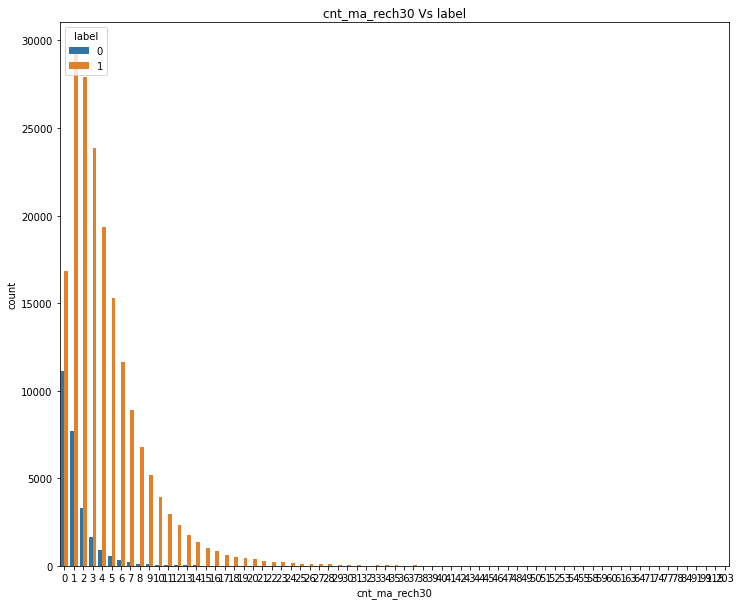

In [18]:
# cnt_ma_rech30 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["cnt_ma_rech30"],  hue=data["label"], data=data)
plt.title("cnt_ma_rech30 Vs label")
plt.show()

The cnt_ma_rech30 data is skewed towards right. The frequncy of no.of times the main account recharged in last 30 days=1 is higher and followed by 2 and 3.
when it is not recharged atleast once in a month, the defualt rate is higher.

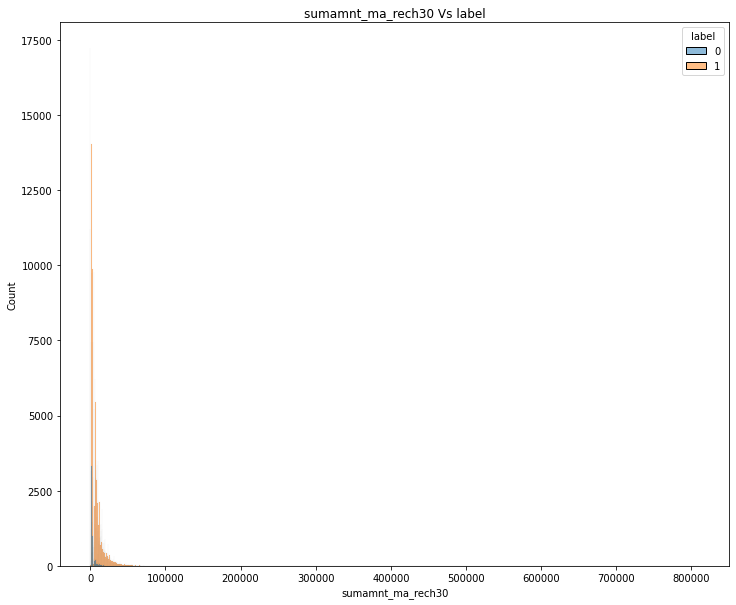

In [19]:
# sumamnt_ma_rech30 Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["sumamnt_ma_rech30"], hue=data["label"], data=data)
plt.title("sumamnt_ma_rech30 Vs label")
plt.show()

Looking at sumamnt_ma_rech30, the data is skewed. we have to transform this to normalize the data.

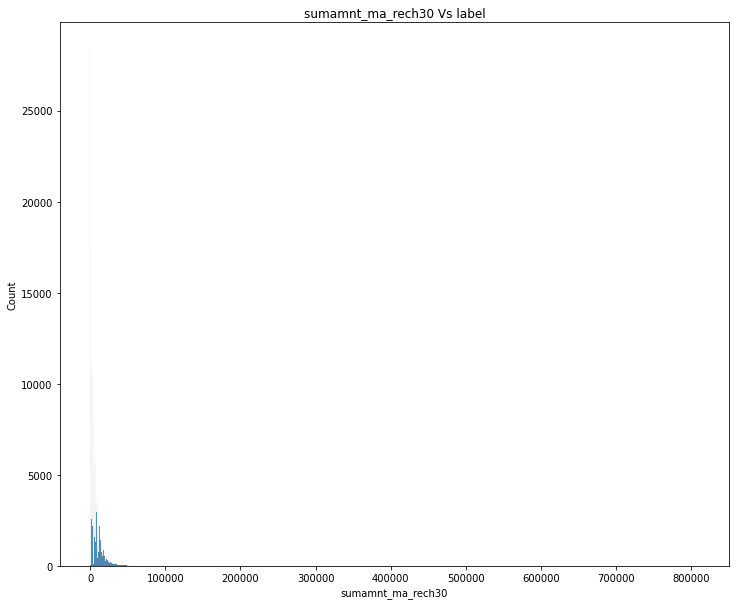

In [20]:
# sumamnt_ma_rech30 Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["sumamnt_ma_rech30"], data=data)
plt.title("sumamnt_ma_rech30 Vs label")
plt.show()

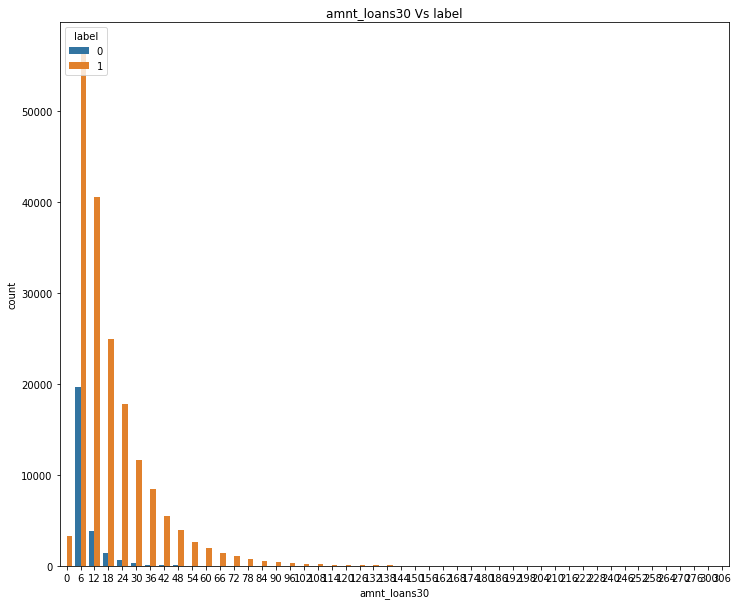

In [21]:
# amnt_loans30 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["amnt_loans30"], hue=data["label"], data=data)
plt.title("amnt_loans30 Vs label")
plt.show()

Looking at the Total amount of loans taken by user in last 30 days i.e. amnt_loans30, the defaulters are more for the loan amount of 5 rupiah. The data is right skewed.

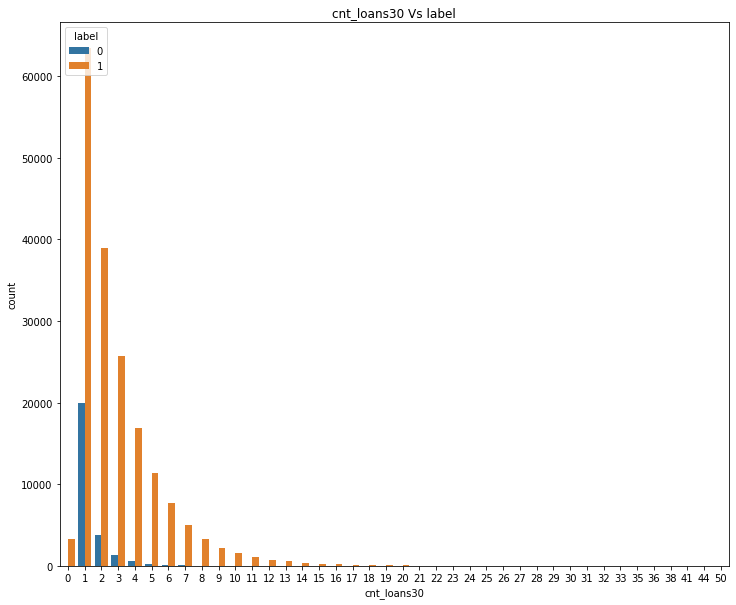

In [22]:
# cnt_loans30 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["cnt_loans30"], hue=data["label"], data=data)
plt.title("cnt_loans30 Vs label")
plt.show()

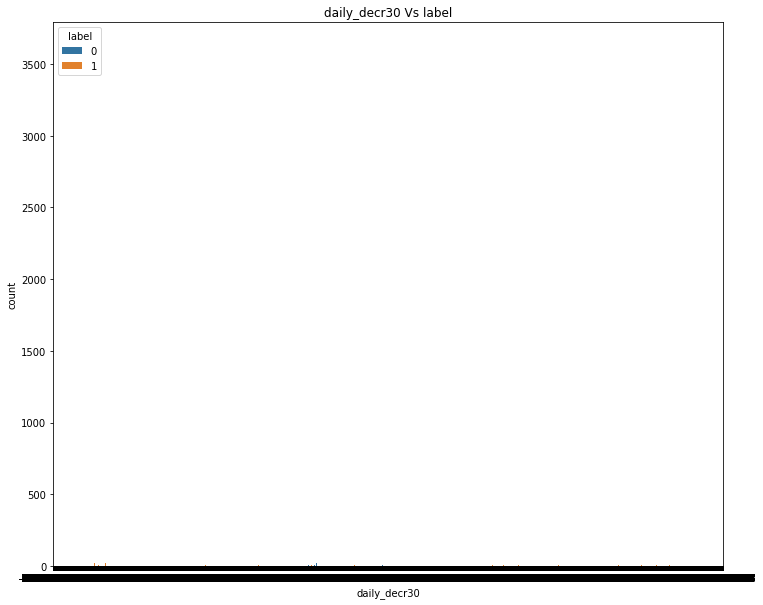

In [23]:
# daily_decr30 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["daily_decr30"], hue=data["label"], data=data)
plt.title("daily_decr30 Vs label")
plt.show()

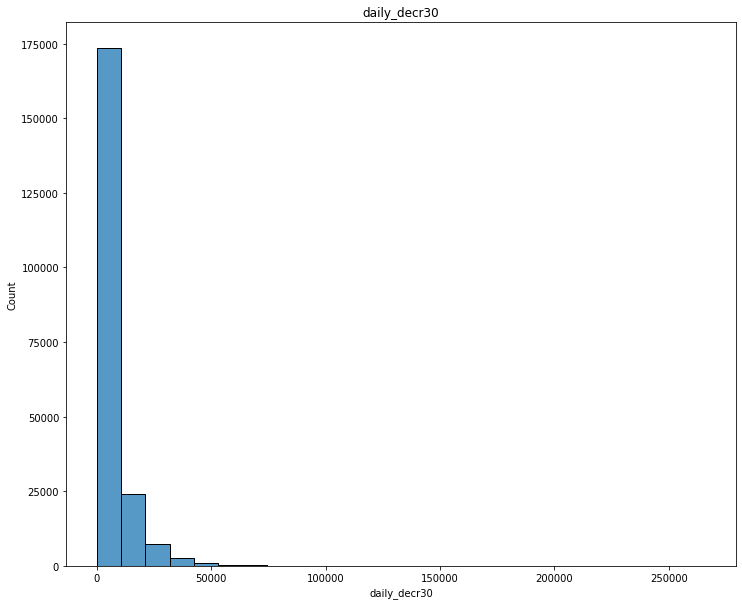

In [10]:
# daily_decr30
plt.figure(figsize=(12,10))
sns.histplot(x=data["daily_decr30"],bins=25, data=data)
plt.title("daily_decr30")
plt.show()

<Figure size 864x720 with 0 Axes>

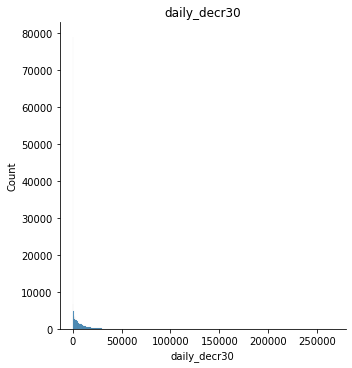

In [25]:
# daily_decr30
plt.figure(figsize=(12,10))
sns.displot(x=data["daily_decr30"], data=data)
plt.title("daily_decr30")
plt.show()

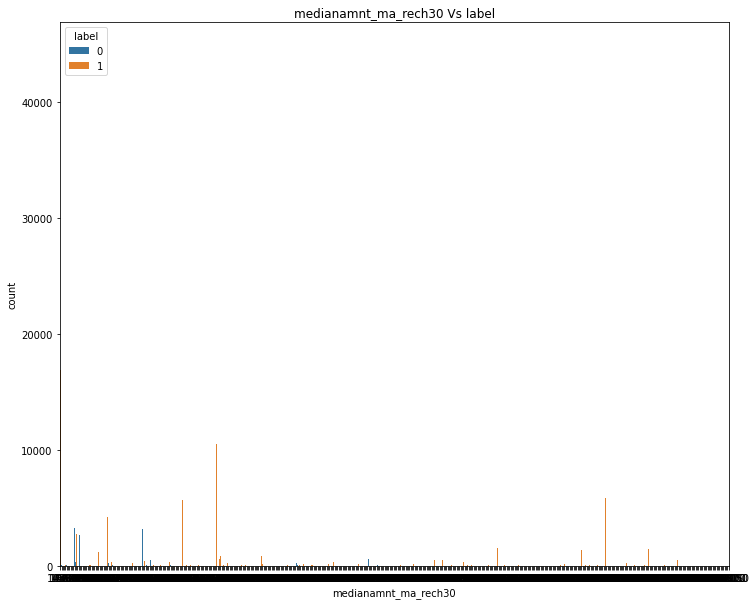

In [9]:
# medianamnt_ma_rech30 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["medianamnt_ma_rech30"], hue=data["label"], data=data)
plt.title("medianamnt_ma_rech30 Vs label")
plt.show()

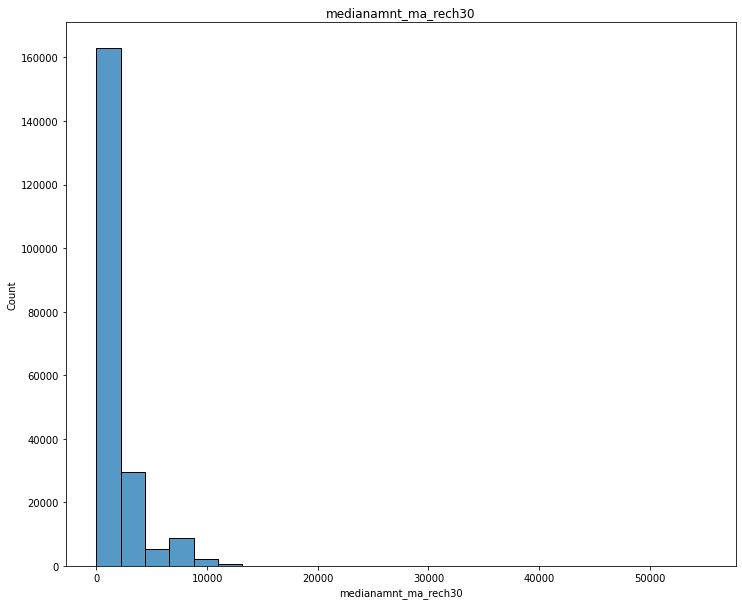

In [7]:
# medianamnt_ma_rech30
plt.figure(figsize=(12,10))
sns.histplot(x=data["medianamnt_ma_rech30"], bins=25, data=data)
plt.title("medianamnt_ma_rech30")
plt.show()

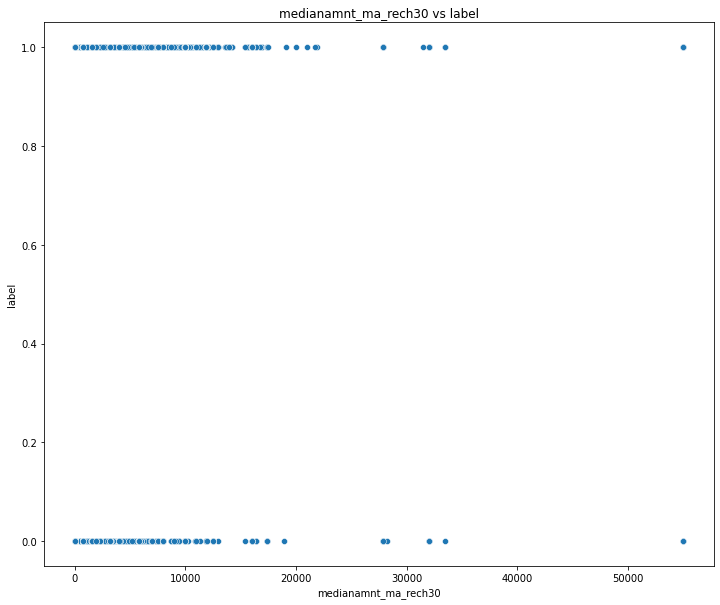

In [28]:
# medianamnt_ma_rech30 Vs label
plt.figure(figsize=(12,10))
sns.scatterplot(x=data["medianamnt_ma_rech30"],y=data["label"], data=data)
plt.title("medianamnt_ma_rech30 vs label")
plt.show()

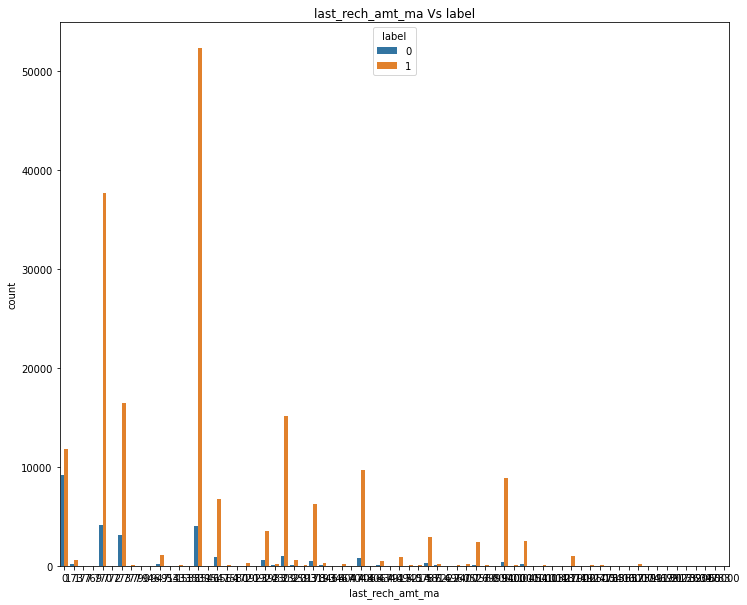

In [29]:
# last_rech_amt_ma Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["last_rech_amt_ma"], hue=data["label"], data=data)
plt.title("last_rech_amt_ma Vs label")
plt.show()

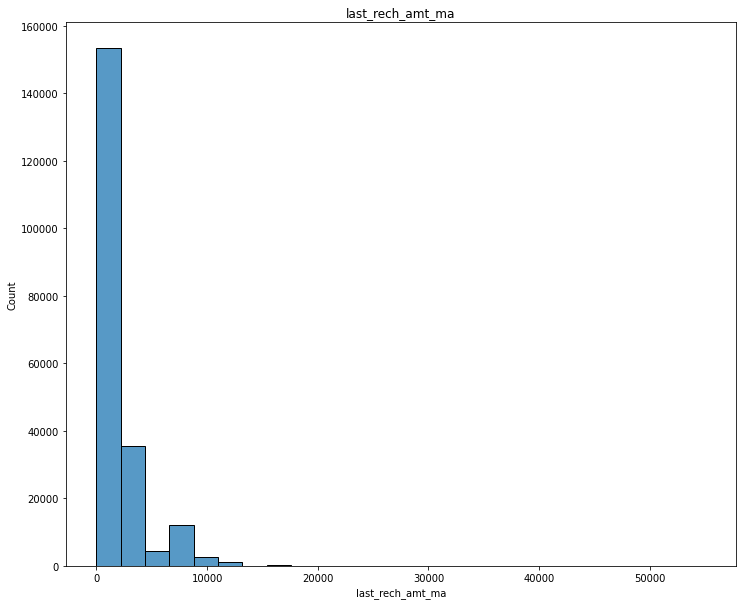

In [5]:
# last_rech_amt_ma Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["last_rech_amt_ma"], bins=25, data=data)
plt.title("last_rech_amt_ma")
plt.show()

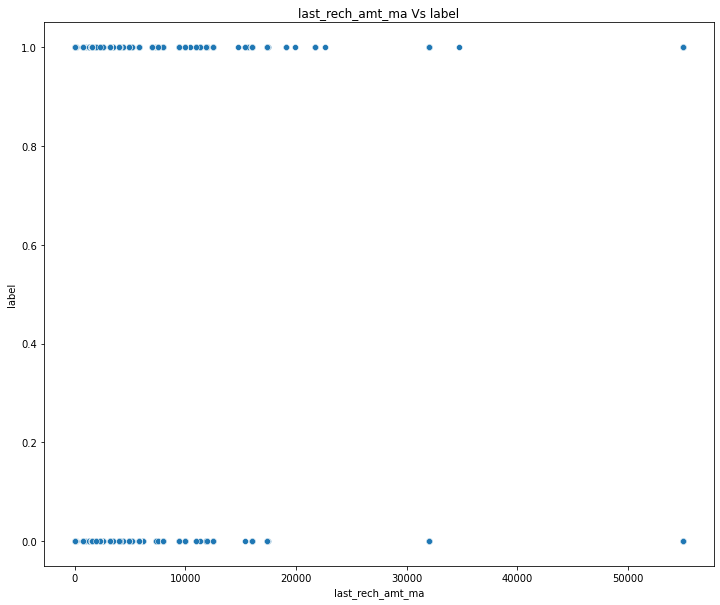

In [31]:
# last_rech_amt_ma Vs label
plt.figure(figsize=(12,10))
sns.scatterplot(x=data["last_rech_amt_ma"], y=data["label"], data=data)
plt.title("last_rech_amt_ma Vs label")
plt.show()

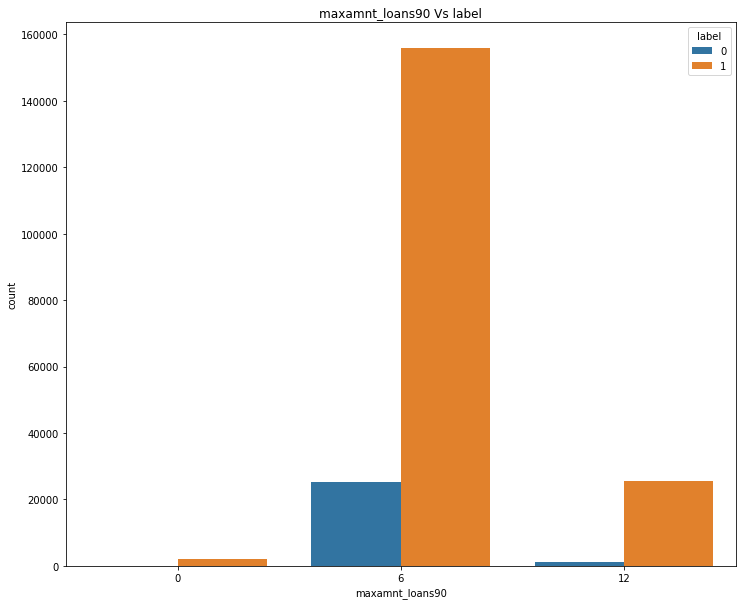

In [32]:
# maxamnt_loans90 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["maxamnt_loans90"], hue=data["label"], data=data)
plt.title("maxamnt_loans90 Vs label")
plt.show()

The majority of the defaulters have taken 5 rupiah loan. maxamnt_loans90 is a categorical value which has 3 categories. 0, 6 and 12.

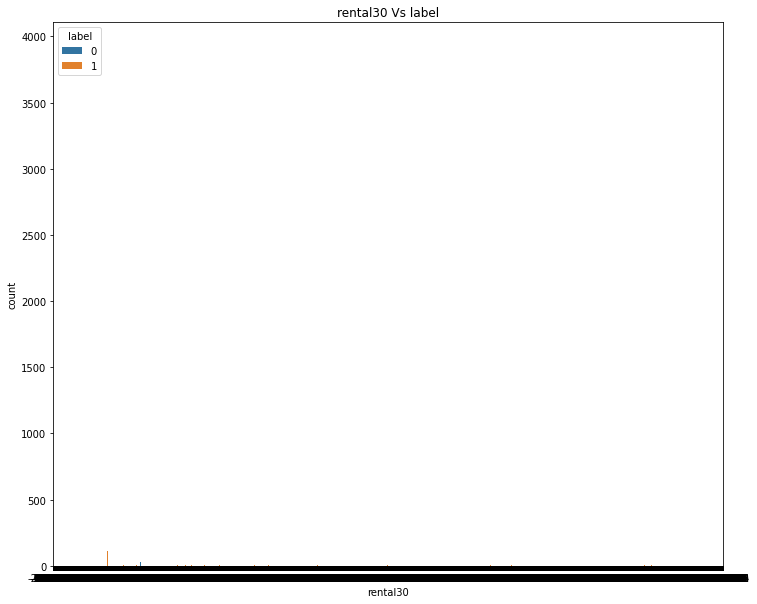

In [33]:
# rental30 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["rental30"], hue=data["label"], data=data)
plt.title("rental30 Vs label")
plt.show()

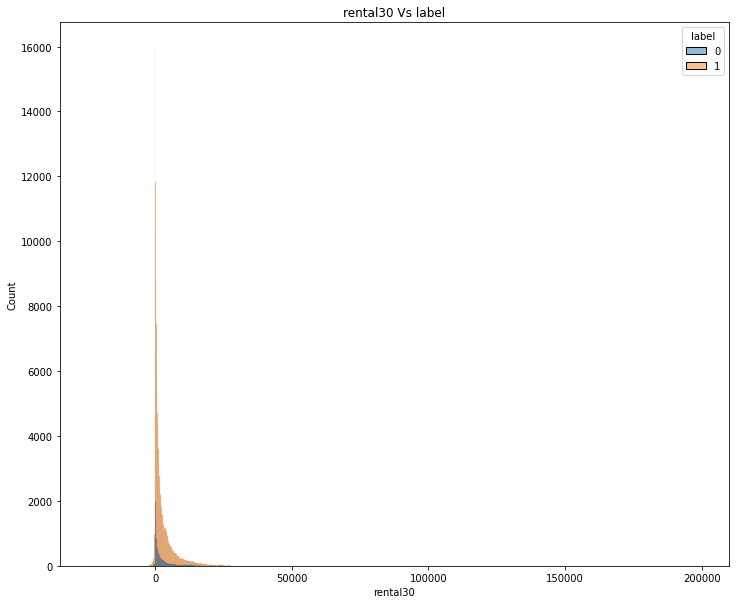

In [34]:
# rental30 Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["rental30"], hue=data["label"], data=data)
plt.title("rental30 Vs label")
plt.show()

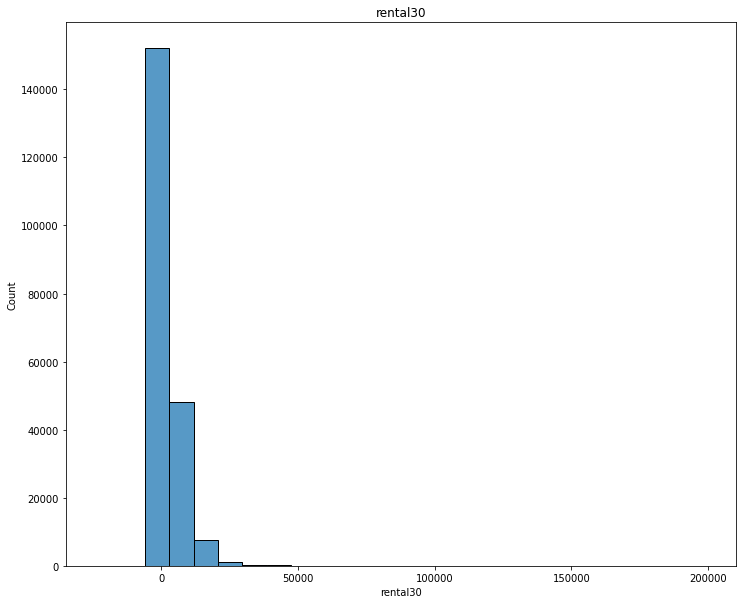

In [11]:
# rental30
plt.figure(figsize=(12,10))
sns.histplot(x=data["rental30"],bins=25, data=data)
plt.title("rental30")
plt.show()

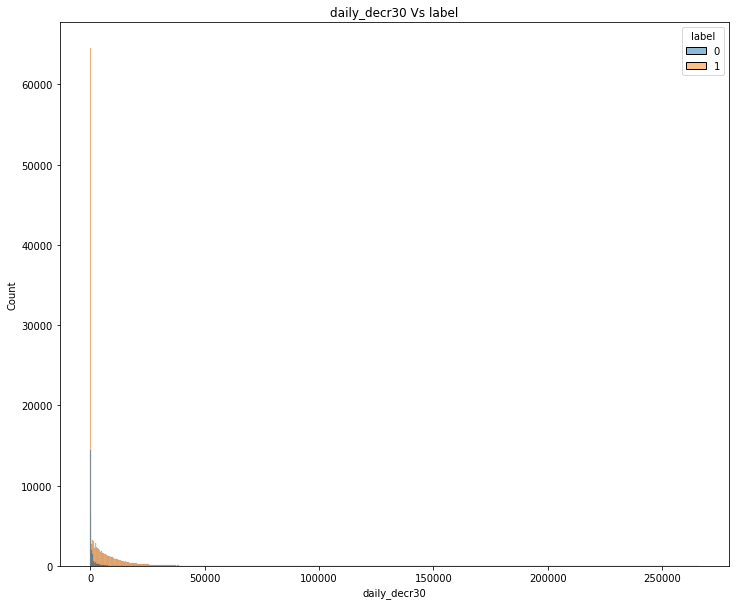

In [36]:
# daily_decr30 Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["daily_decr30"], hue=data["label"], data=data)
plt.title("daily_decr30 Vs label")
plt.show()

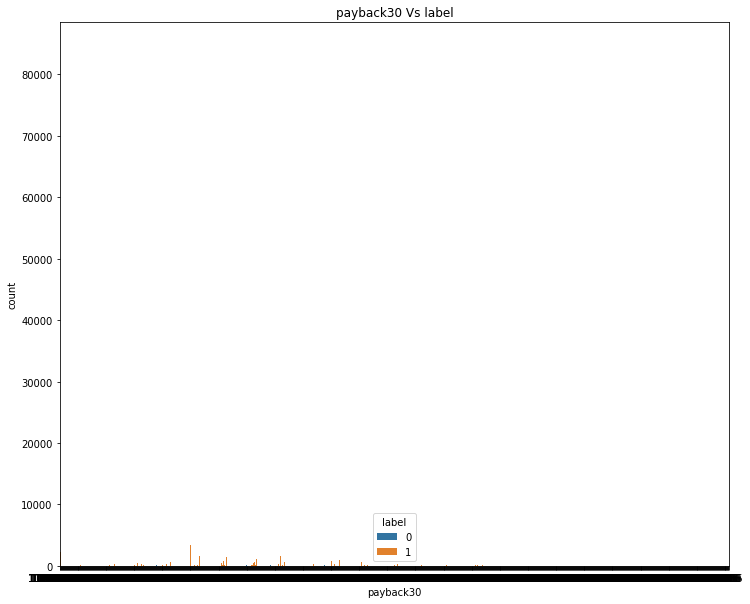

In [37]:
# payback30 Vs label
plt.figure(figsize=(12,10))
sns.countplot(x=data["payback30"], hue=data["label"], data=data)
plt.title("payback30 Vs label")
plt.show()

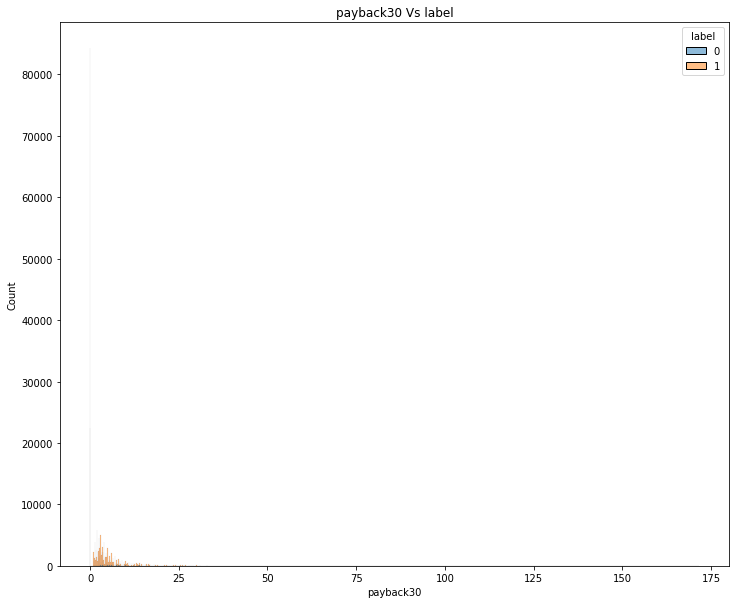

In [38]:
# payback30 Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["payback30"], hue=data["label"], data=data)
plt.title("payback30 Vs label")
plt.show()

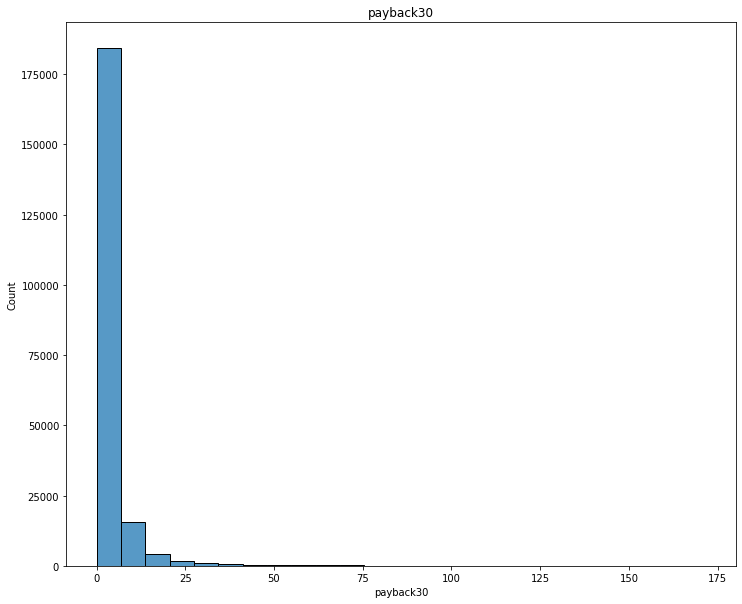

In [13]:
# payback30 Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["payback30"],bins=25, data=data)
plt.title("payback30")
plt.show()

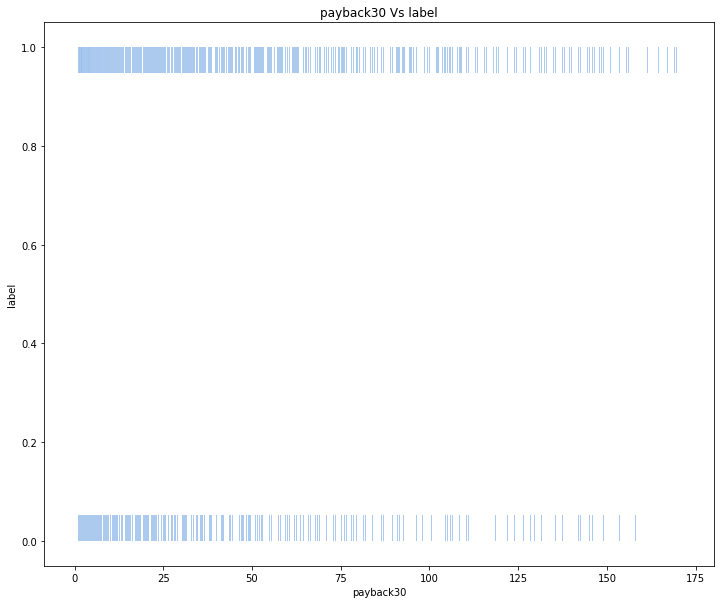

In [40]:
# payback30 Vs label
plt.figure(figsize=(12,10))
sns.histplot(x=data["payback30"], y=data["label"], data=data)
plt.title("payback30 Vs label")
plt.show()

In [437]:
#Lets remove the unused columns which we have already identified: Unnamed: 0, msisdn, pcircle and pdate.
data.drop(["Unnamed: 0", "msisdn", "pcircle", "pdate"],axis=1, inplace=True)

In [438]:
#Numerical values are of 2 types, continuous and descrete variables
descrete_data=[col for col in data if len(data[col].unique())<25]
print("Descrete variable Counts : {}".format(len(descrete_data)))

Descrete variable Counts : 4


In [439]:
descrete_data

['label', 'medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90']

As maxamnt_loans90 is descrete value, maxamnt_loans30 also should have been descrete value. As both of these columns serve same information, we can drop off maxamnt_loans30 column.

In [440]:
data.drop(["maxamnt_loans30"], axis=1, inplace=True)

In [441]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [442]:
continuous_data=[col for col in data if col not in descrete_data]
print("continuous variable count {}".format(len(continuous_data)))

continuous variable count 28


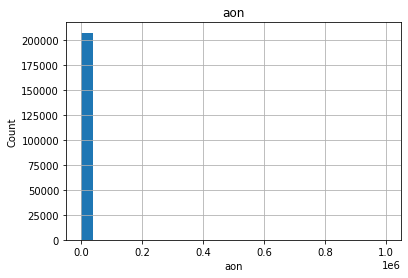

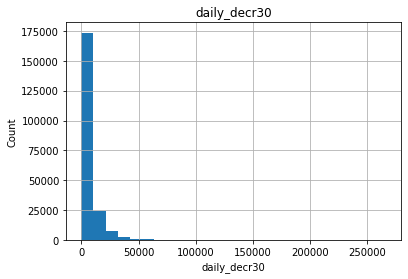

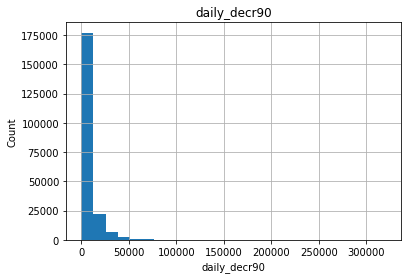

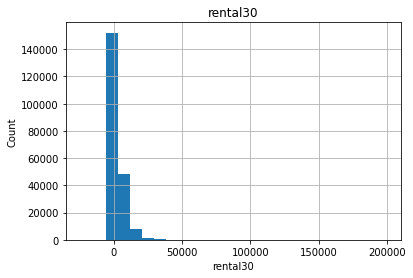

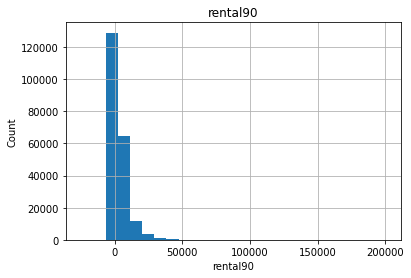

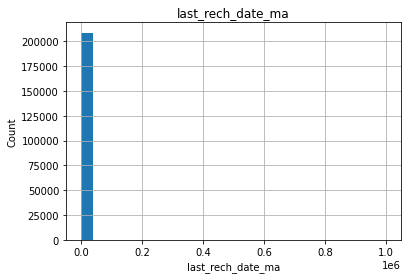

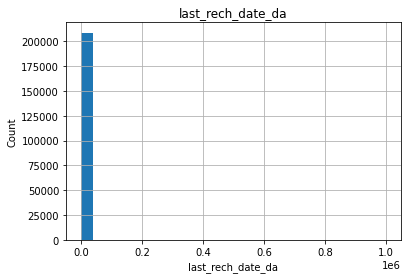

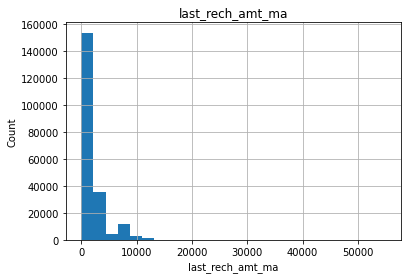

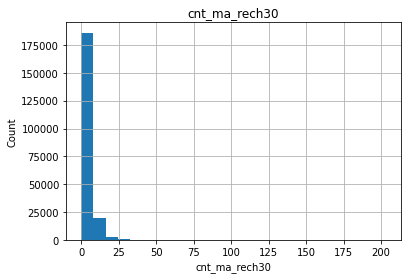

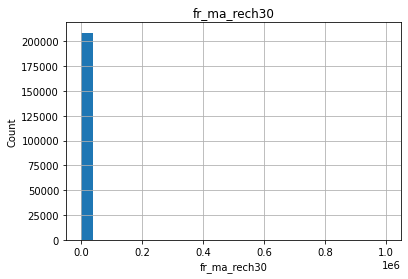

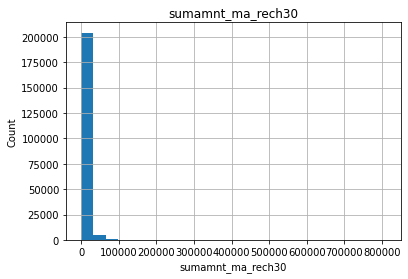

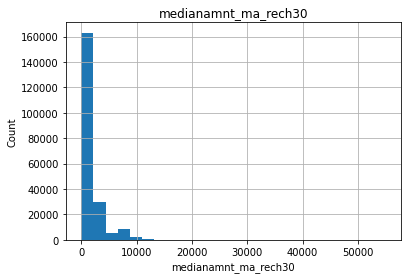

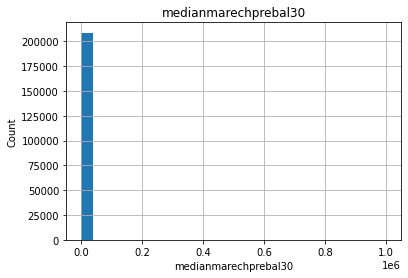

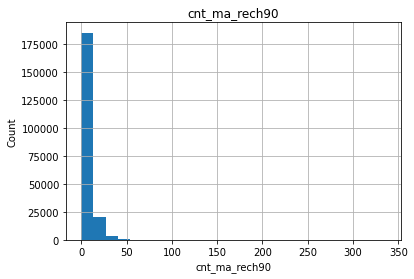

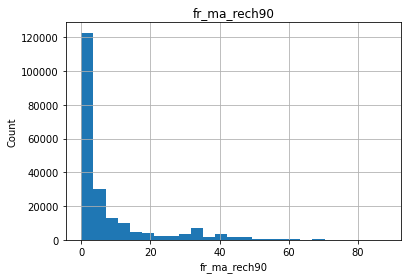

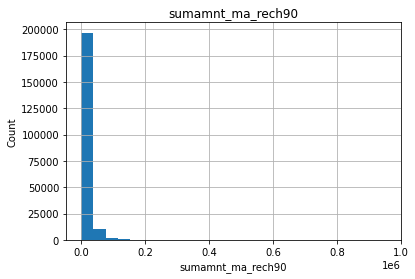

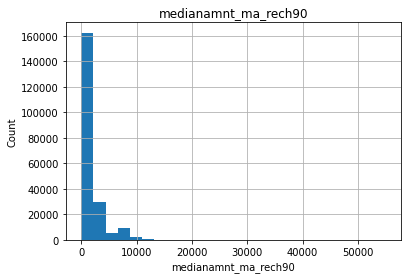

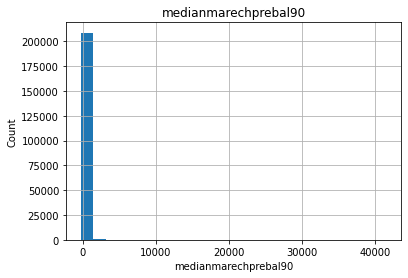

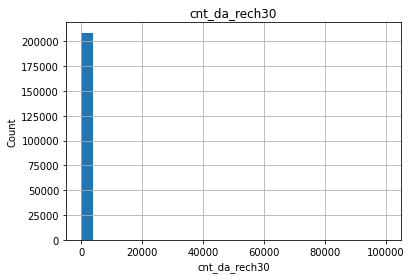

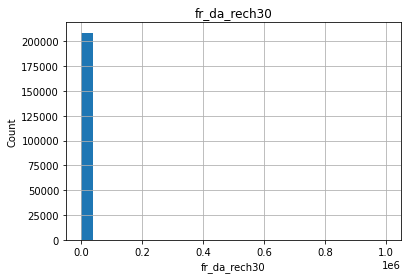

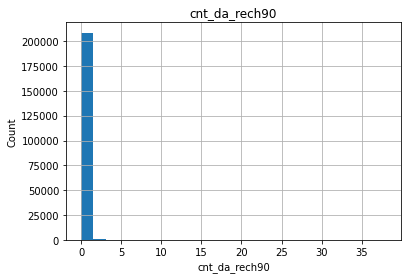

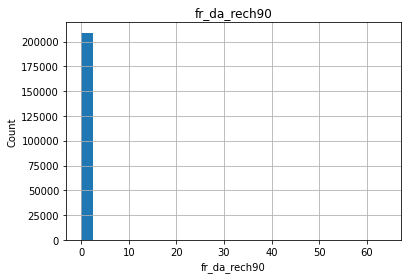

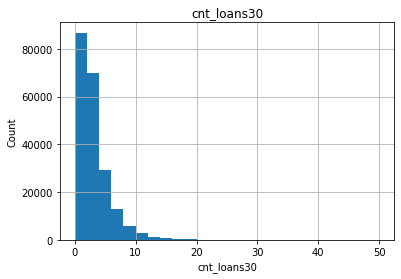

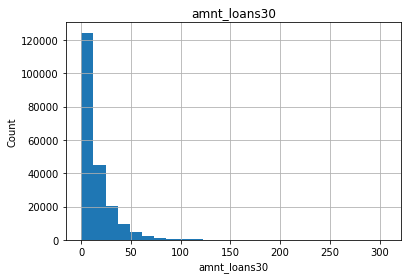

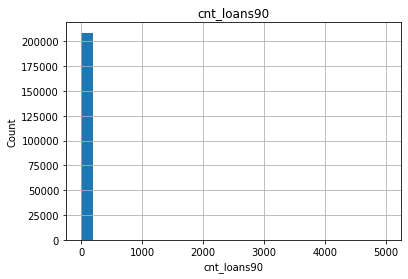

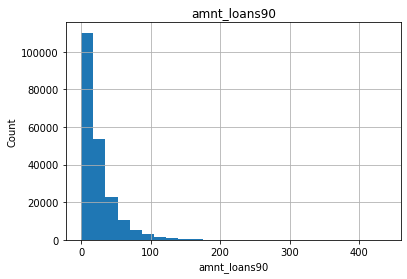

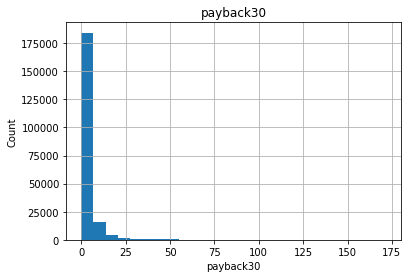

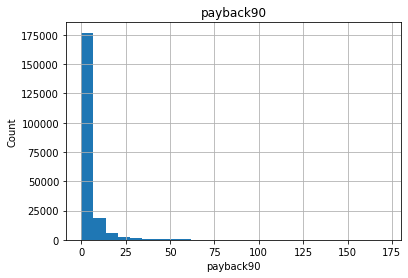

In [443]:

## Lets analyse the continuous values by creating histograms to understand the distribution/skewness 

for col in continuous_data:
    df=data.copy()
    df[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

In [444]:
continuous_data

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [445]:
#Lets transform these skewed data using Power_Transform

from sklearn.preprocessing import PowerTransformer

df = data.copy()
features = df[continuous_data]

pt = PowerTransformer()

df[continuous_data] = pt.fit_transform(features.values)
df
#data[continuous_data] = pt.fit_transform(data[continuous_data].values)
#data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,-0.177906,0.208594,-0.041301,-0.577409,1.335401,-0.440305,0.146193,-0.325841,-0.141497,-0.087125,-0.162110,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,1.813266,1.783964
1,1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,0.016926,-1.027906,-1.207069,-0.086685,1.682267,-0.002722,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.097563,0.0,-1.034294,-0.250850,12,0.0,-0.937405,-1.018917
2,1,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.020765,-1.027906,-1.207069,-0.760548,0.146193,0.023770,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
3,1,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.027906,-1.207069,-0.949332,-0.253806,-0.370968,-0.141497,-0.087125,-0.162110,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,-0.937405,-1.018917
4,1,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,1.262660,0.575164,-0.011178,0.657800,-0.060965,0.974121,0.783547,-0.142977,-0.141497,-0.087125,-0.162110,-0.064375,1.570451,1.454951,0.0,1.180312,1.097886,6,0.0,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,0.664001,0.903883,0.037462,-0.256024,-0.060965,0.305507,0.894046,0.145343,-0.141497,-0.087125,-0.162110,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,0.094998,-0.098305
209589,1,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,-0.175310,-0.303313,0.073687,0.373347,-0.060965,-0.296176,-0.400935,0.234990,-0.141497,-0.087125,-0.162110,-0.064375,0.556347,0.393236,0.0,0.300689,0.192260,6,0.0,0.094998,-0.098305
209590,1,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,0.575767,0.208594,0.009245,0.984805,0.509415,0.765499,0.146193,-0.075343,-0.141497,-0.087125,-0.162110,-0.064375,0.924658,1.454951,0.0,1.038116,1.358455,12,0.0,0.974292,0.752939
209591,1,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,0.795555,-0.303313,0.074916,0.373347,0.369295,0.734963,0.585178,0.182589,-0.141497,-0.087125,6.168644,-0.064375,0.011773,0.393236,0.0,0.300689,0.503740,12,0.0,-0.937405,1.337831


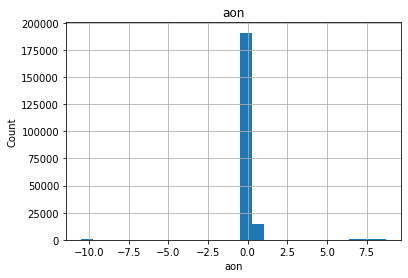

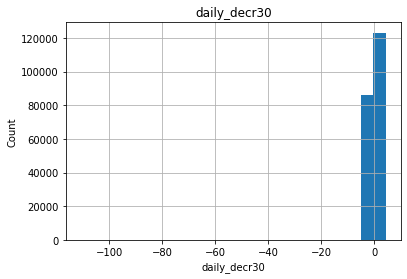

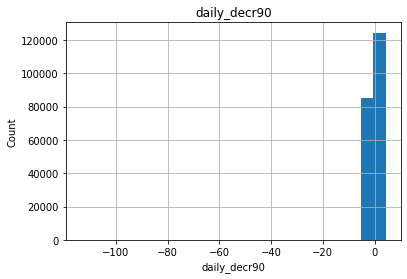

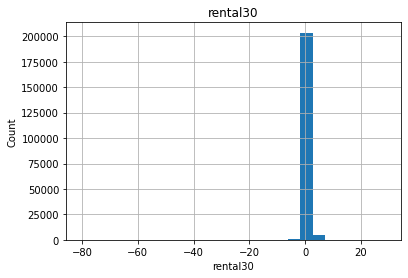

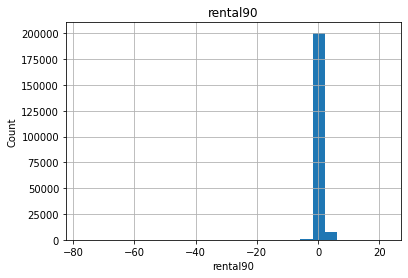

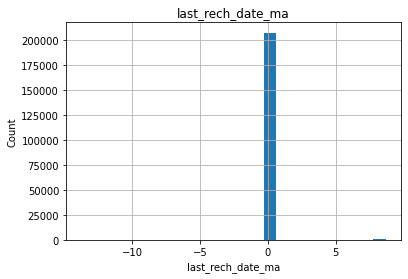

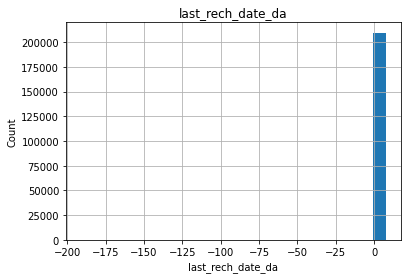

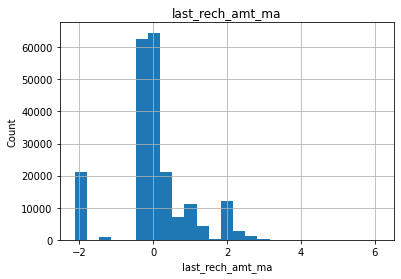

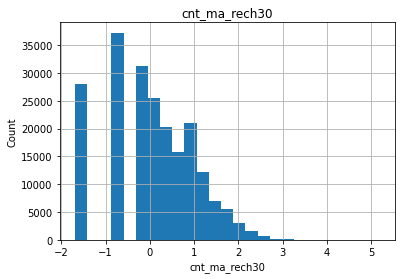

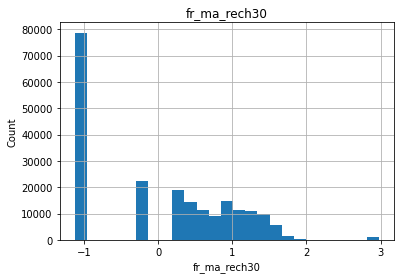

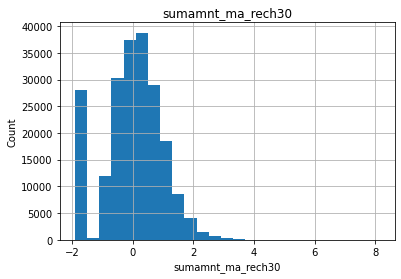

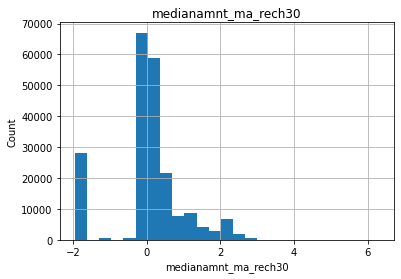

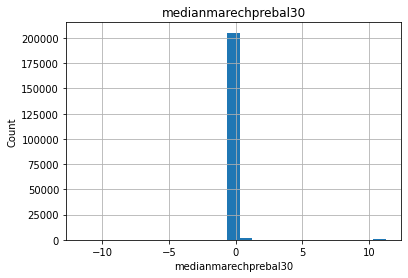

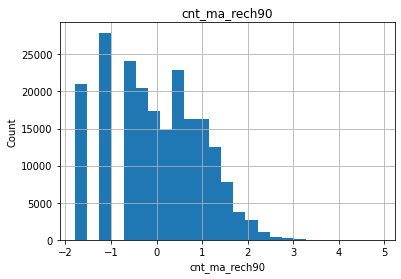

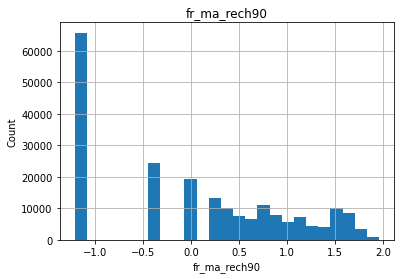

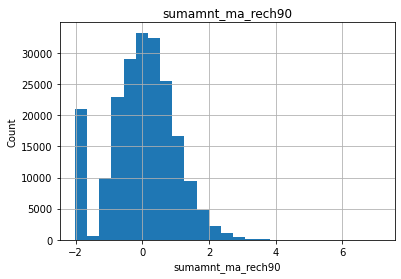

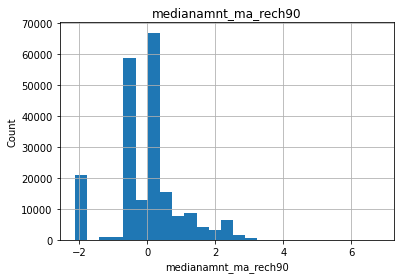

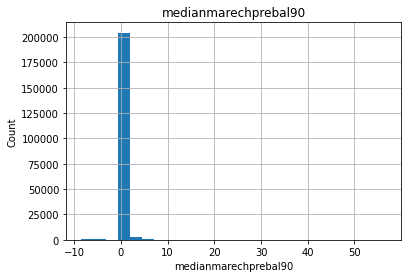

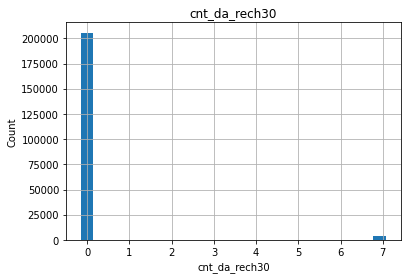

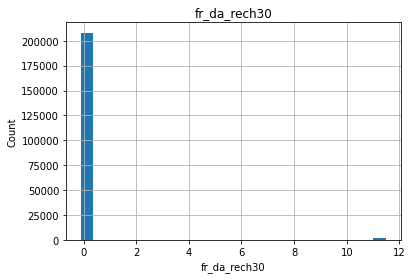

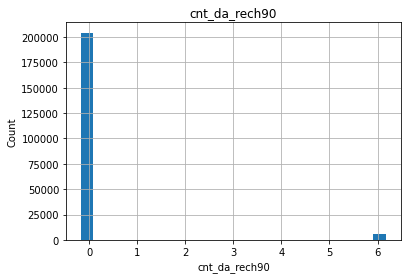

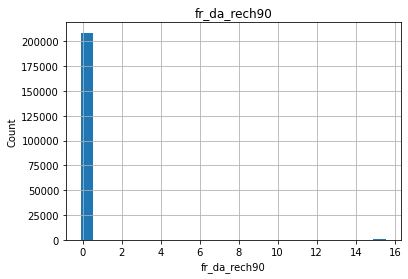

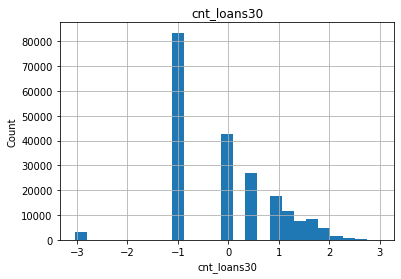

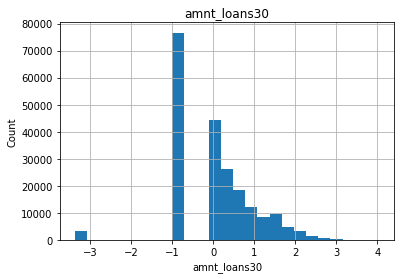

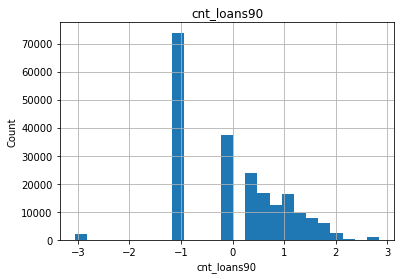

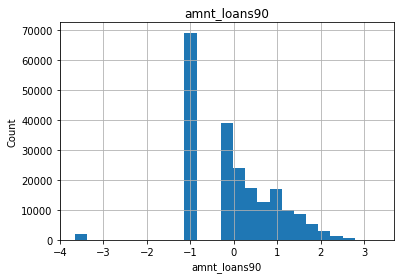

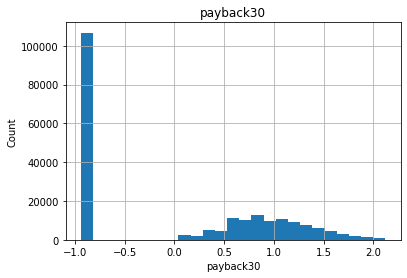

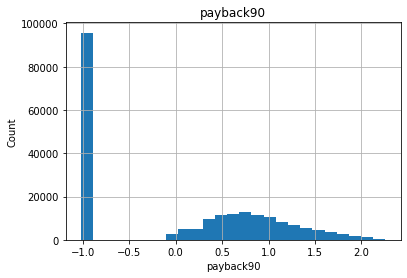

In [446]:
for col in continuous_data:
    df[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

In [447]:
df.shape

(209593, 32)

In [448]:
#Q-Q plot:
from scipy import stats

def diagnostic_plots(df,var):
    #function to plot a histogram and Q-Q plot
    #side by side, for a certain variable
    
    plt.figure(figsize=(15,16))
    plt.subplot(1,2,1)
    df[var].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist = 'norm', plot=plt)
    plt.show()

aon


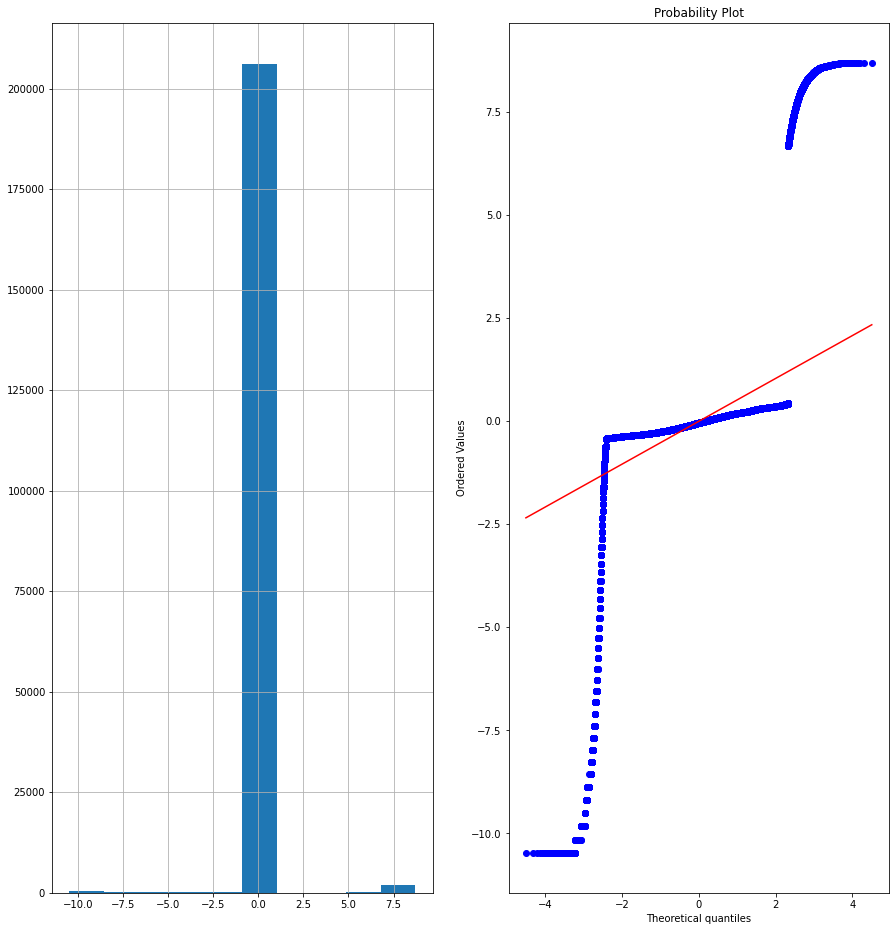

daily_decr30


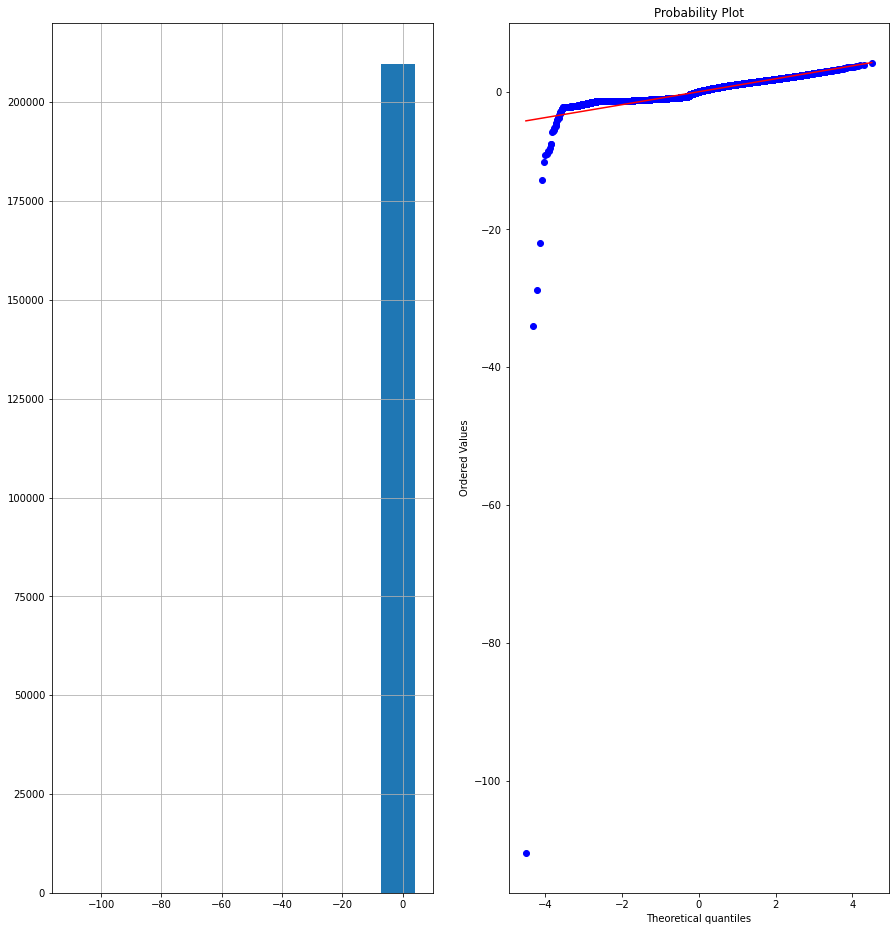

daily_decr90


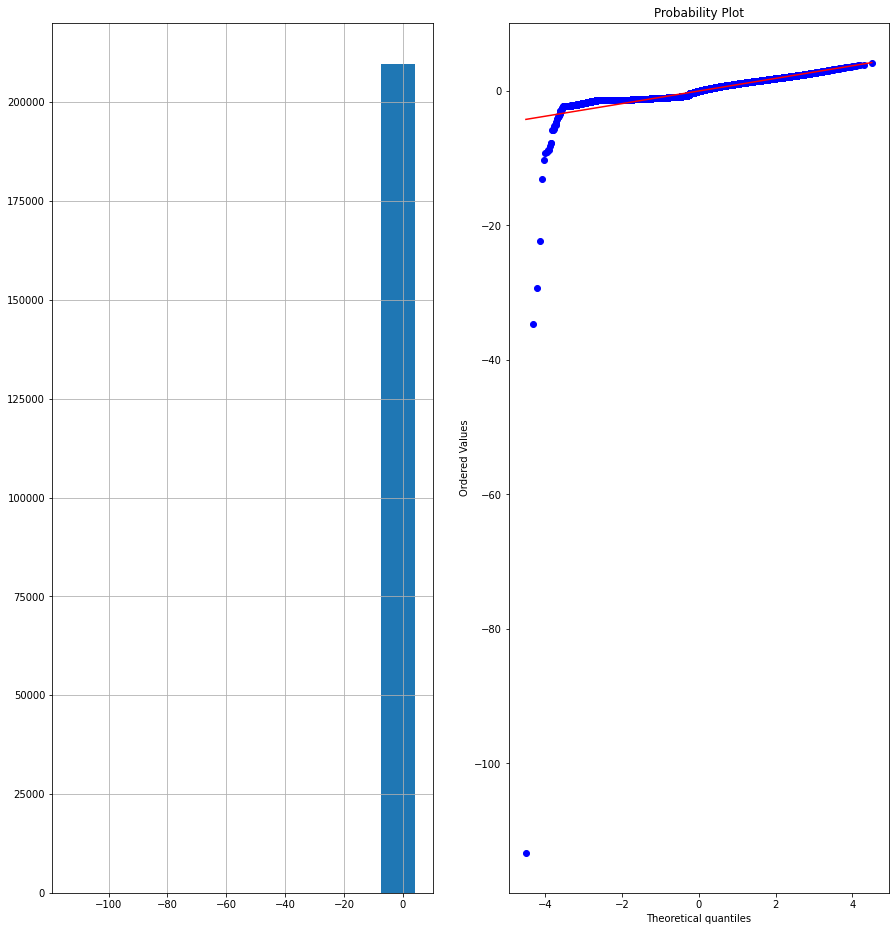

rental30


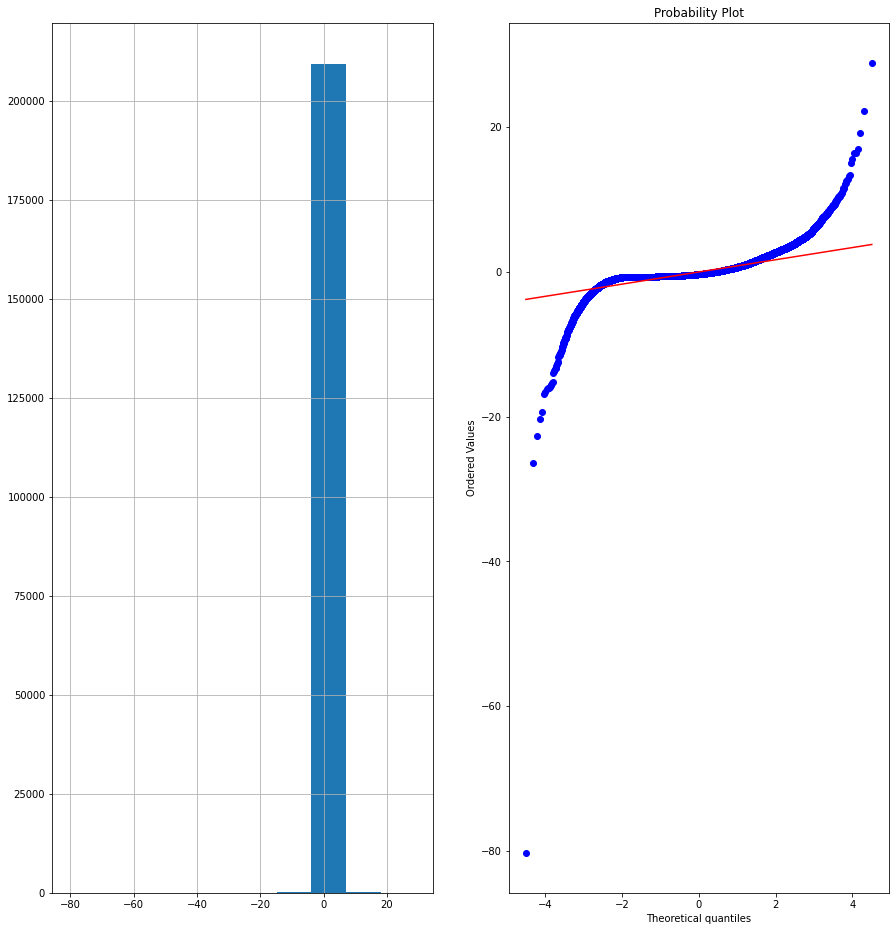

rental90


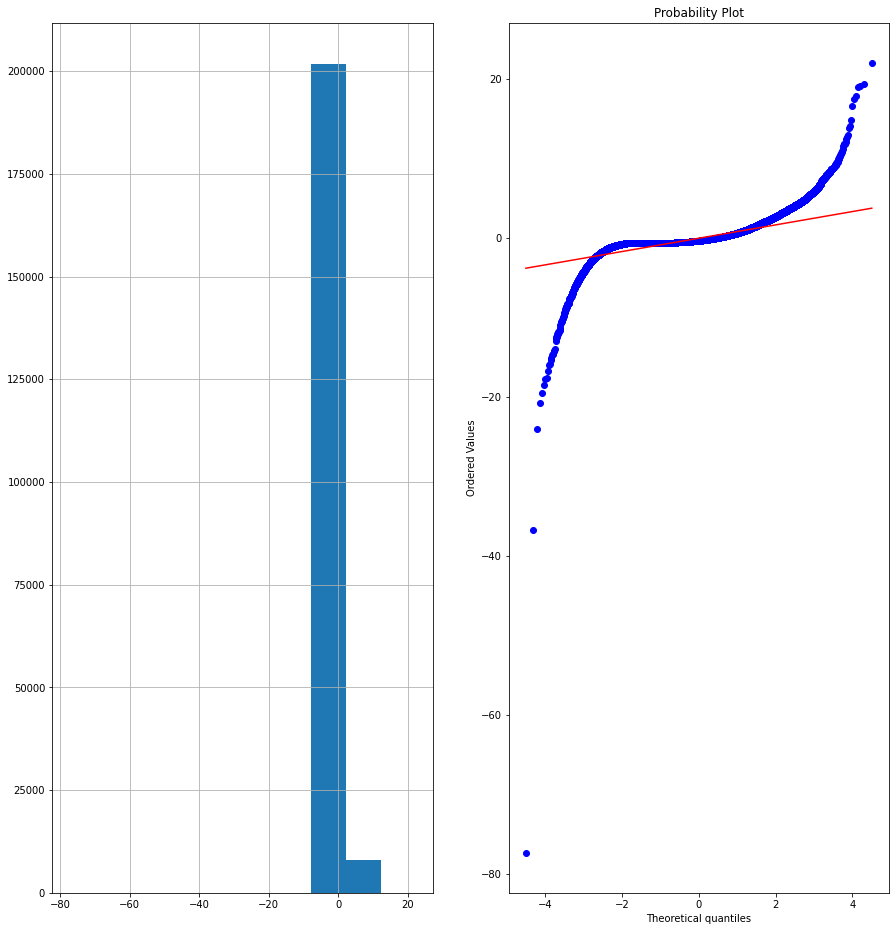

last_rech_date_ma


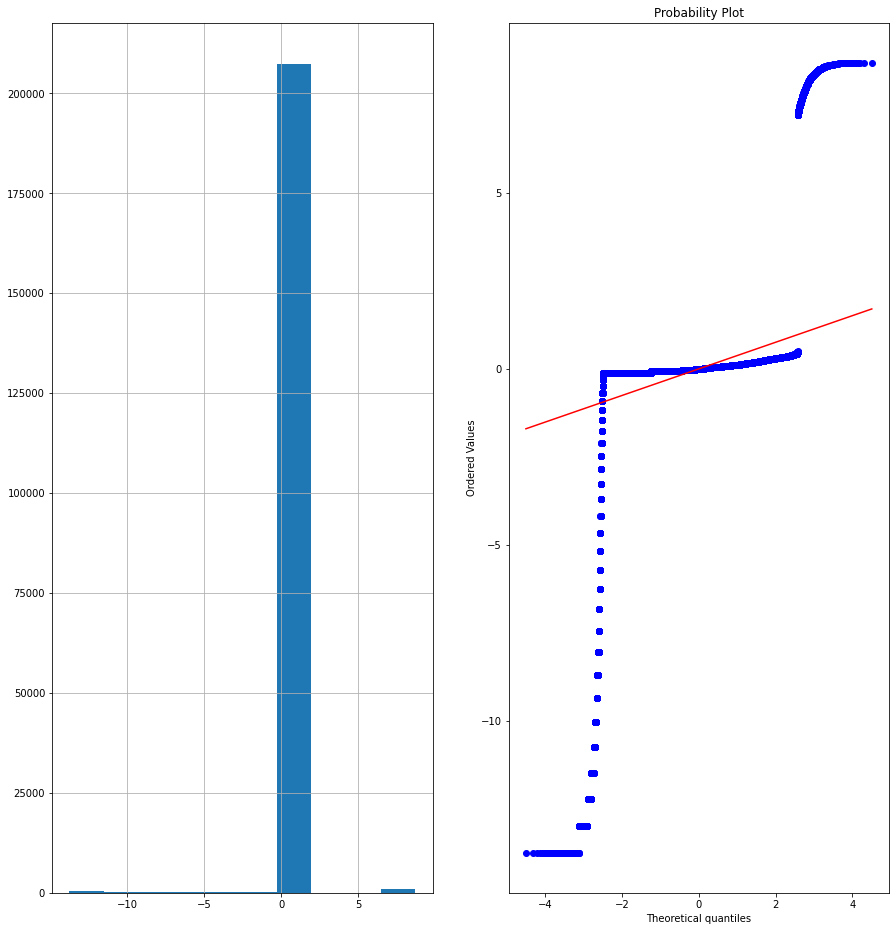

last_rech_date_da


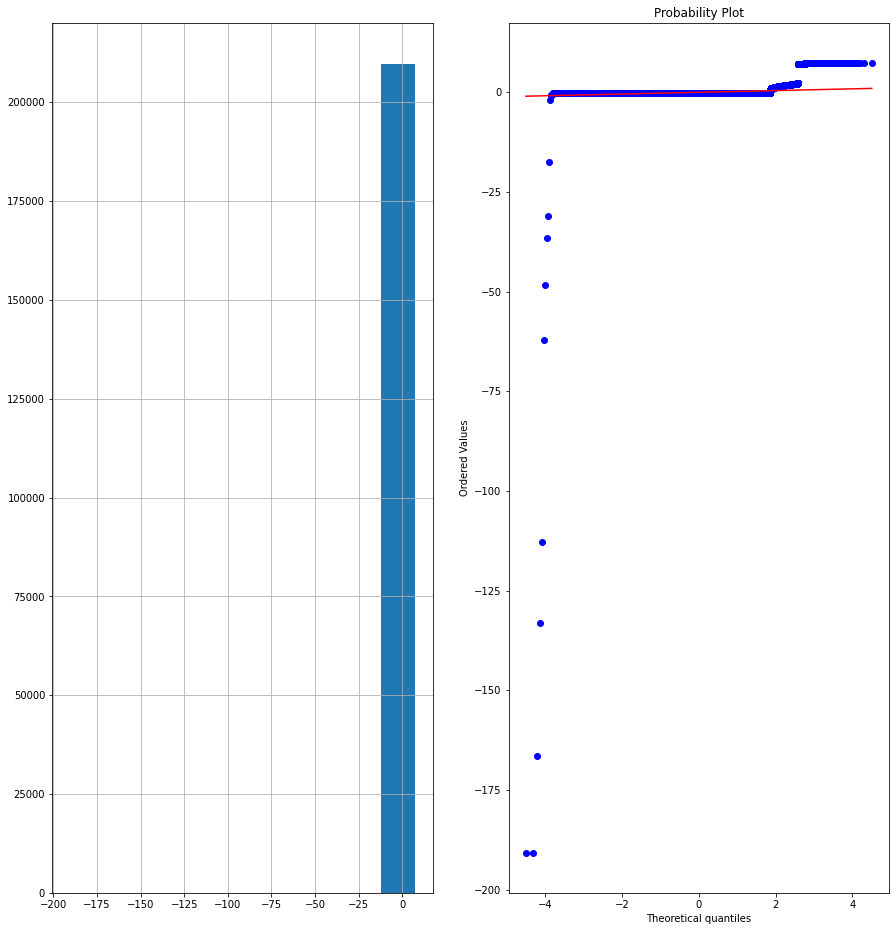

last_rech_amt_ma


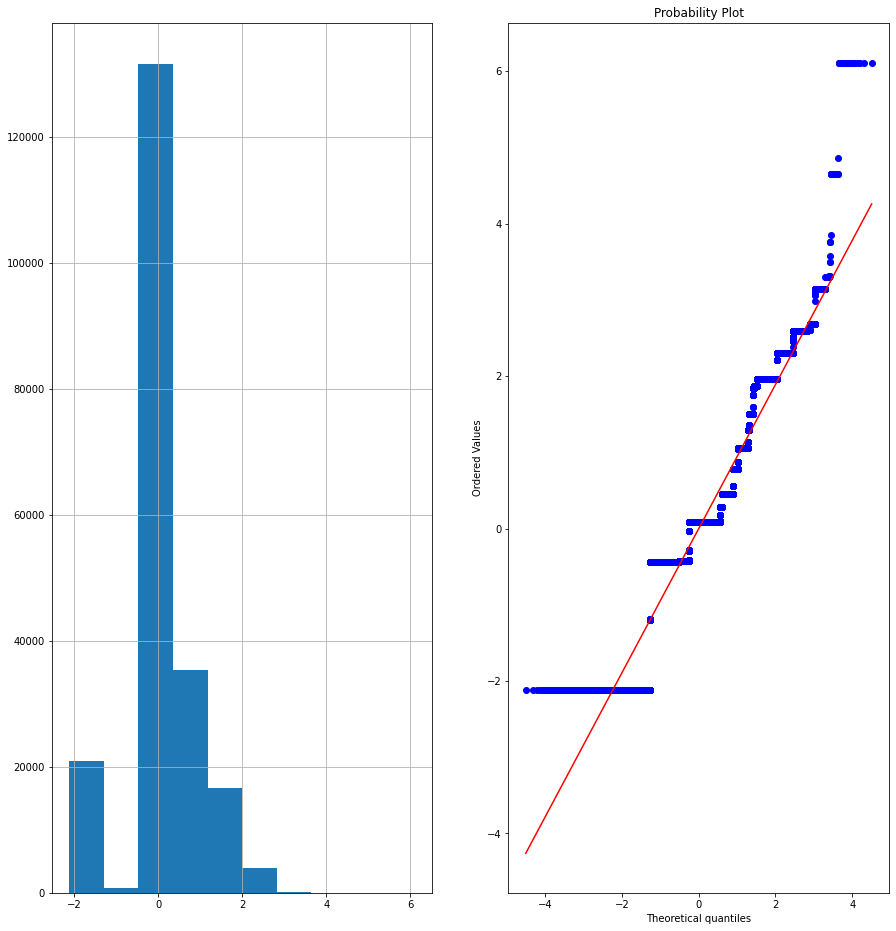

cnt_ma_rech30


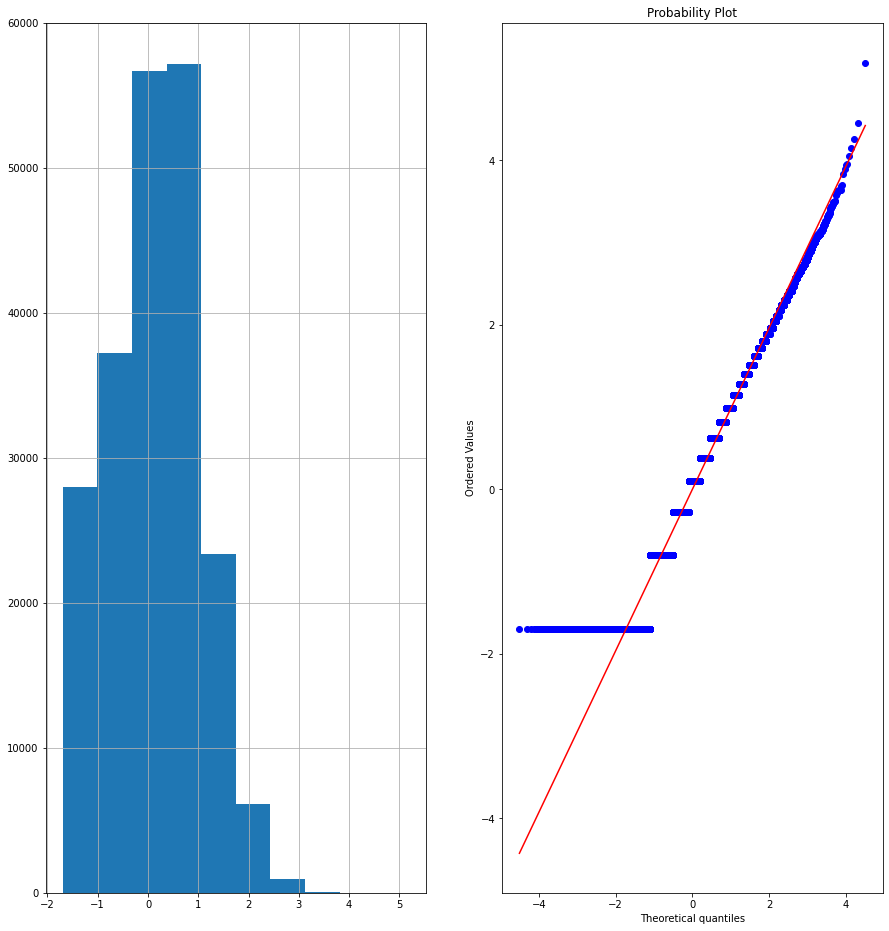

fr_ma_rech30


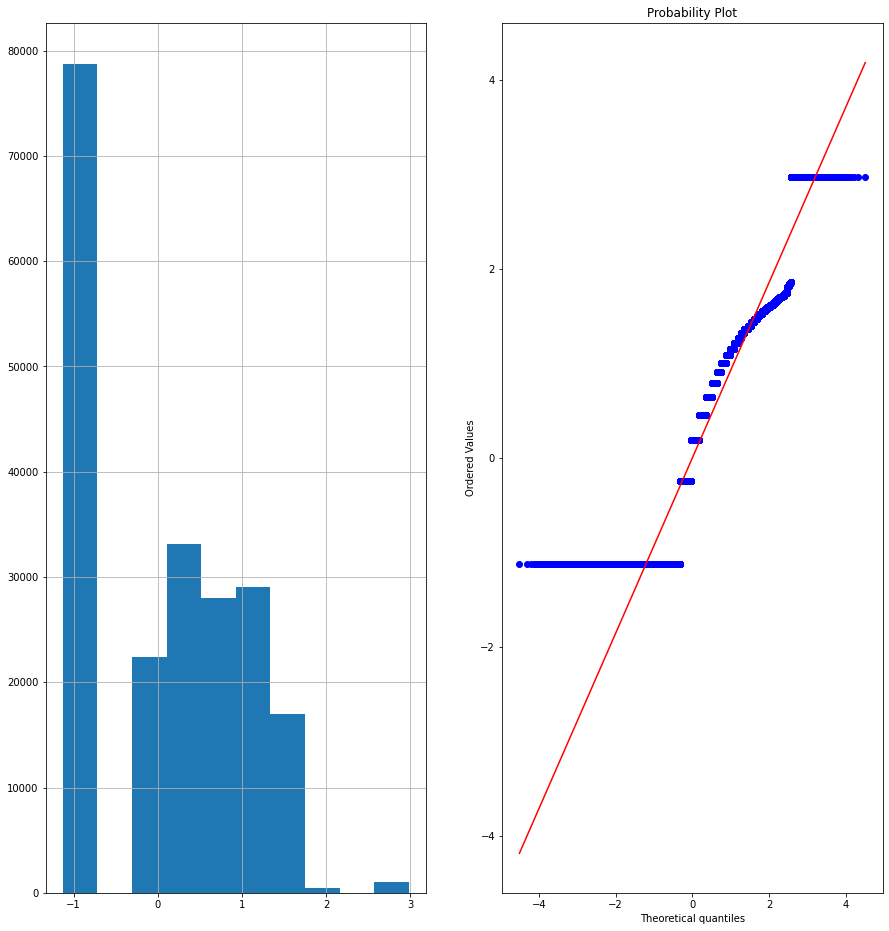

sumamnt_ma_rech30


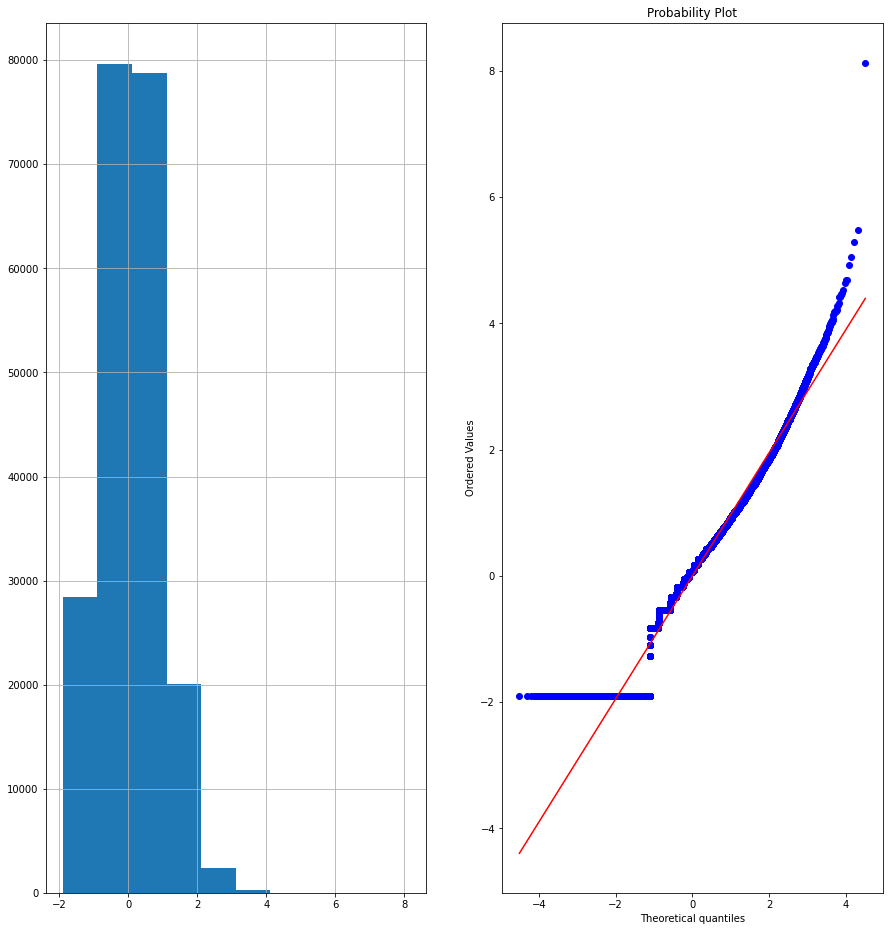

medianamnt_ma_rech30


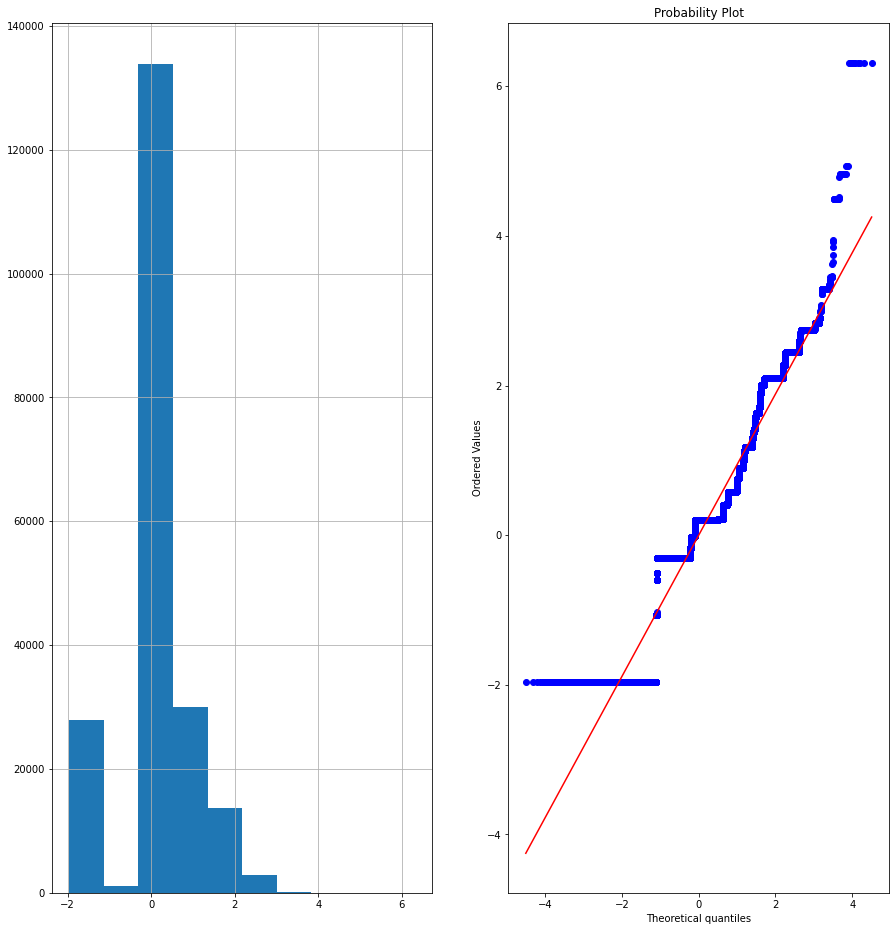

medianmarechprebal30


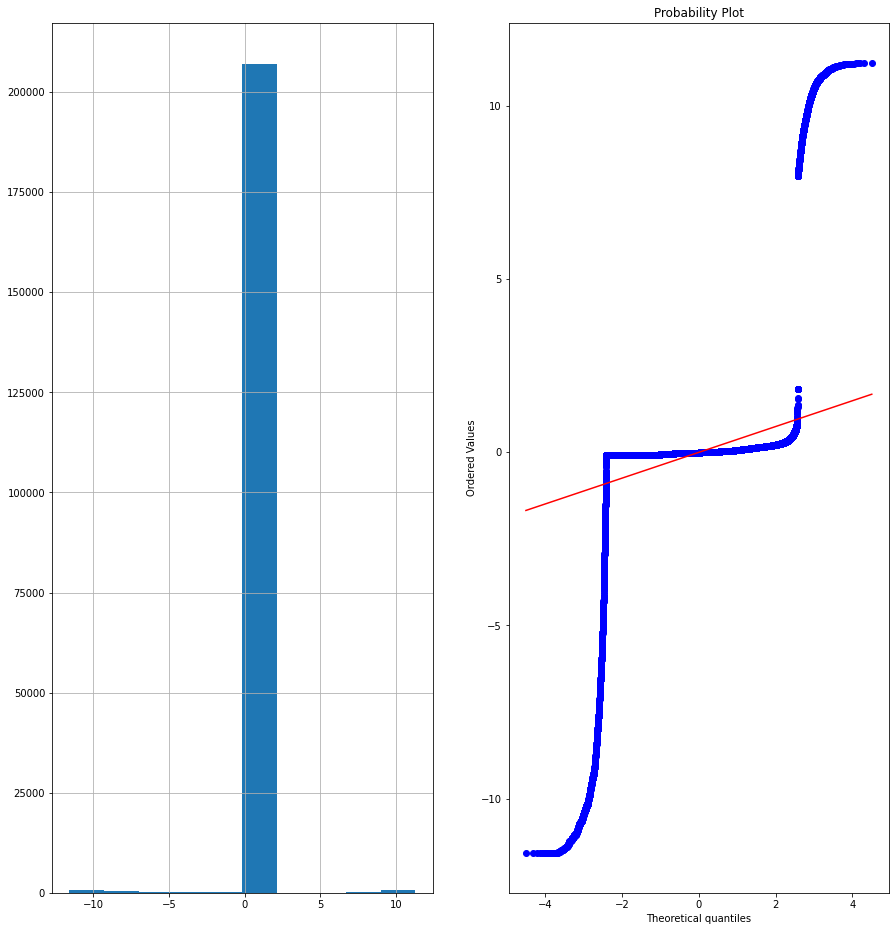

cnt_ma_rech90


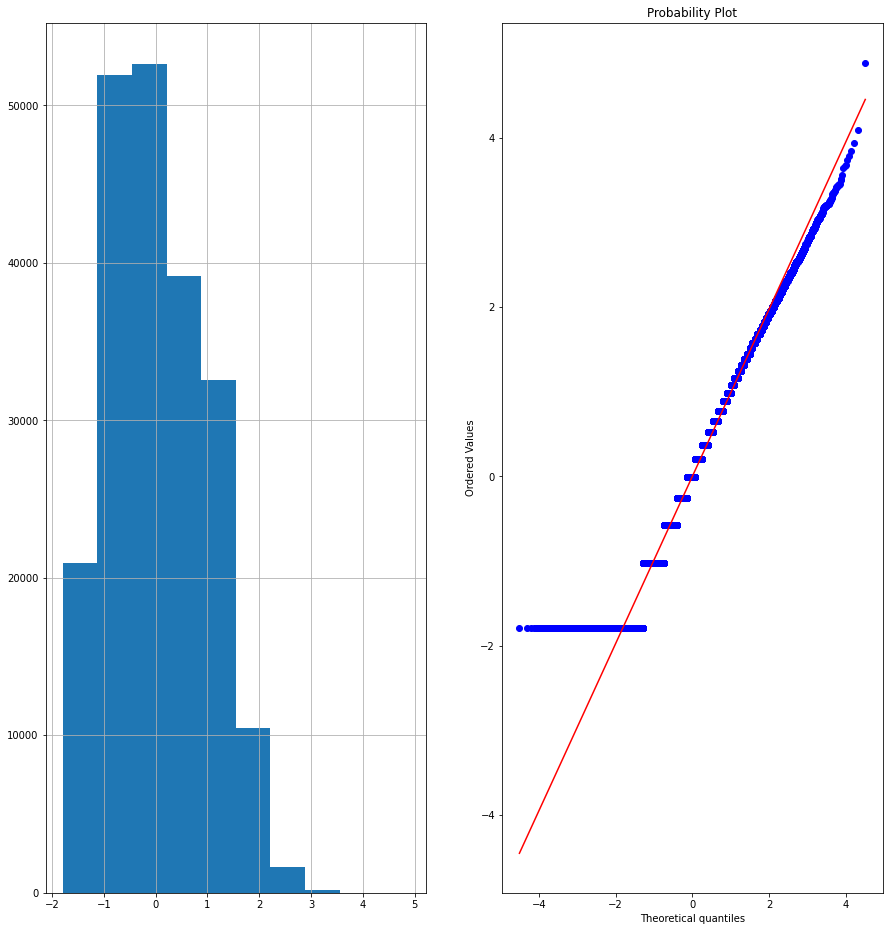

fr_ma_rech90


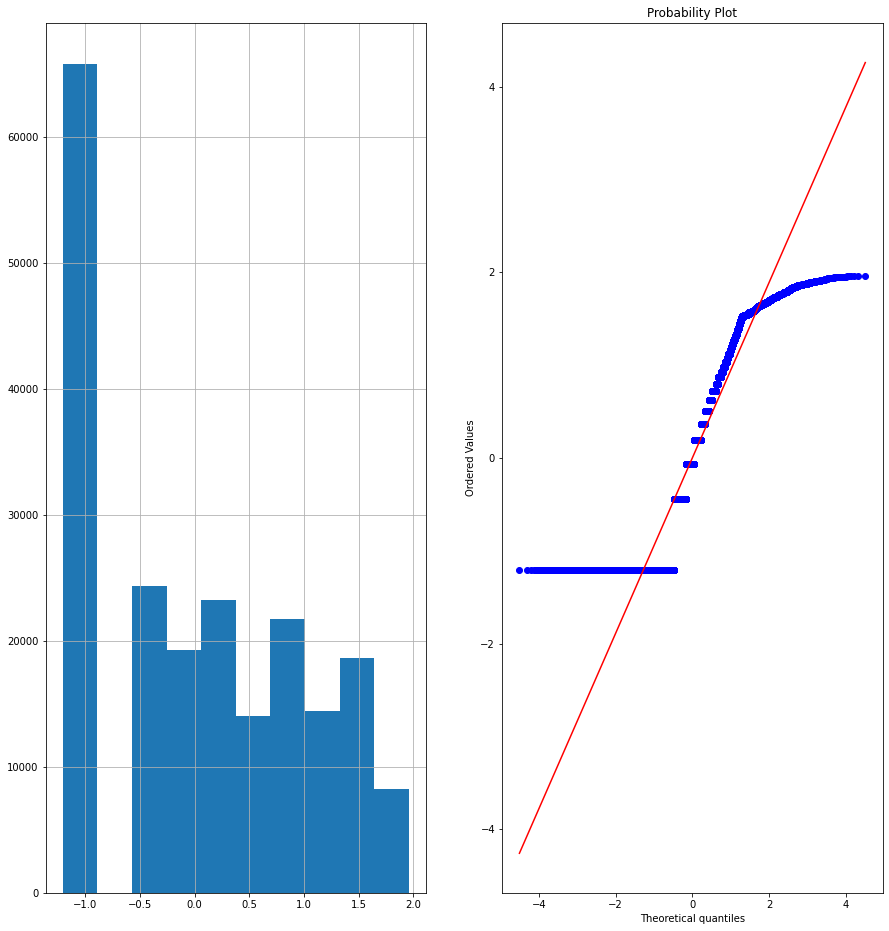

sumamnt_ma_rech90


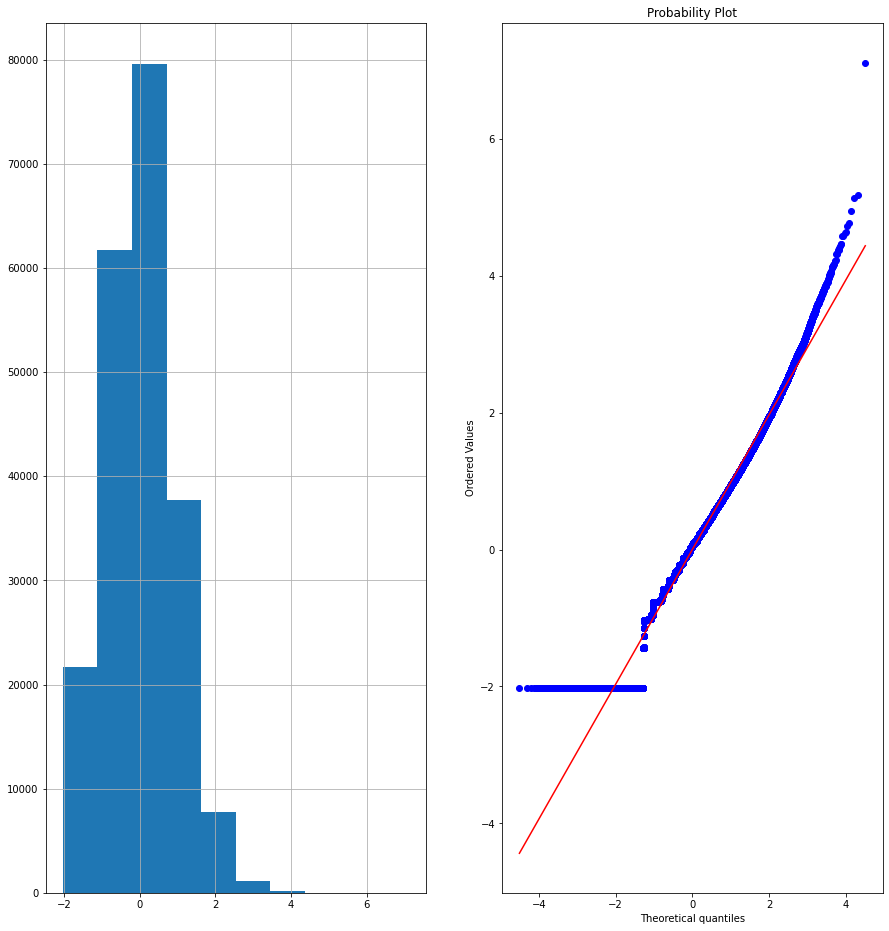

medianamnt_ma_rech90


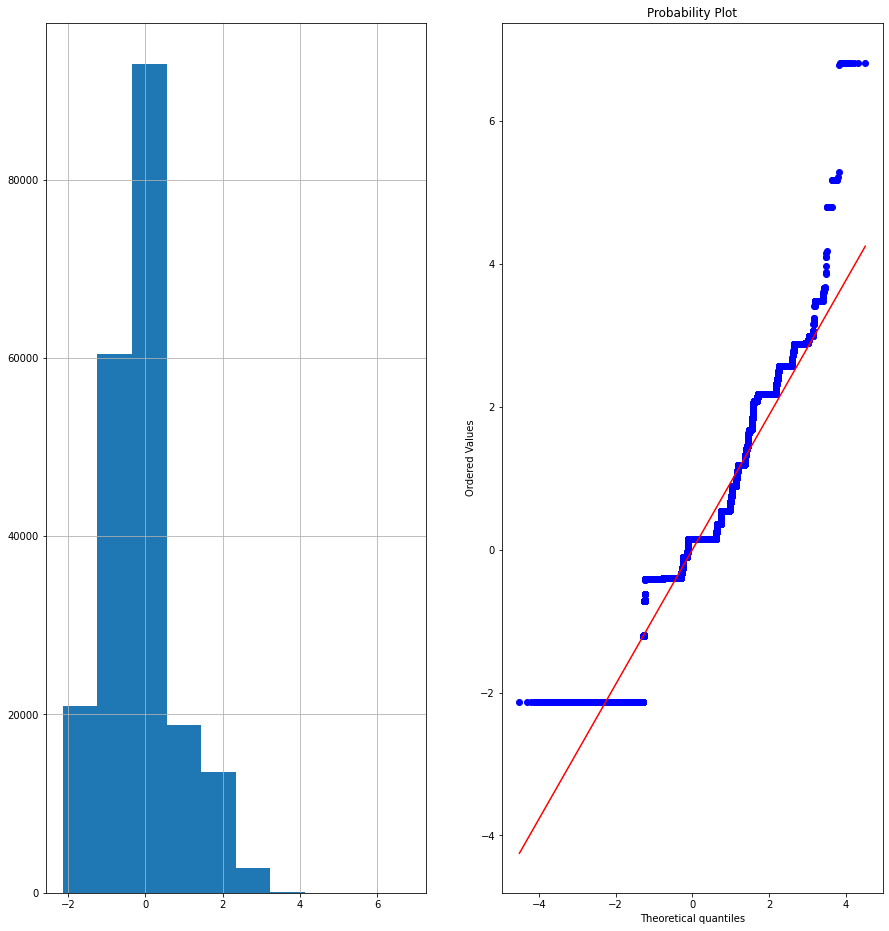

medianmarechprebal90


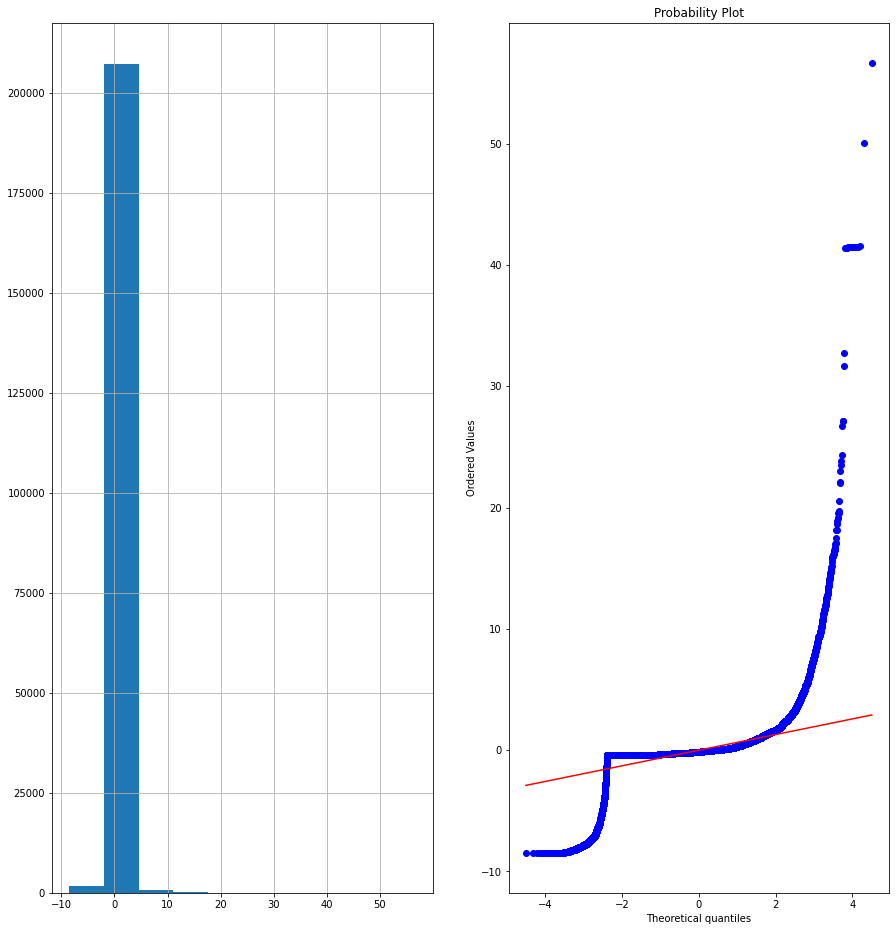

cnt_da_rech30


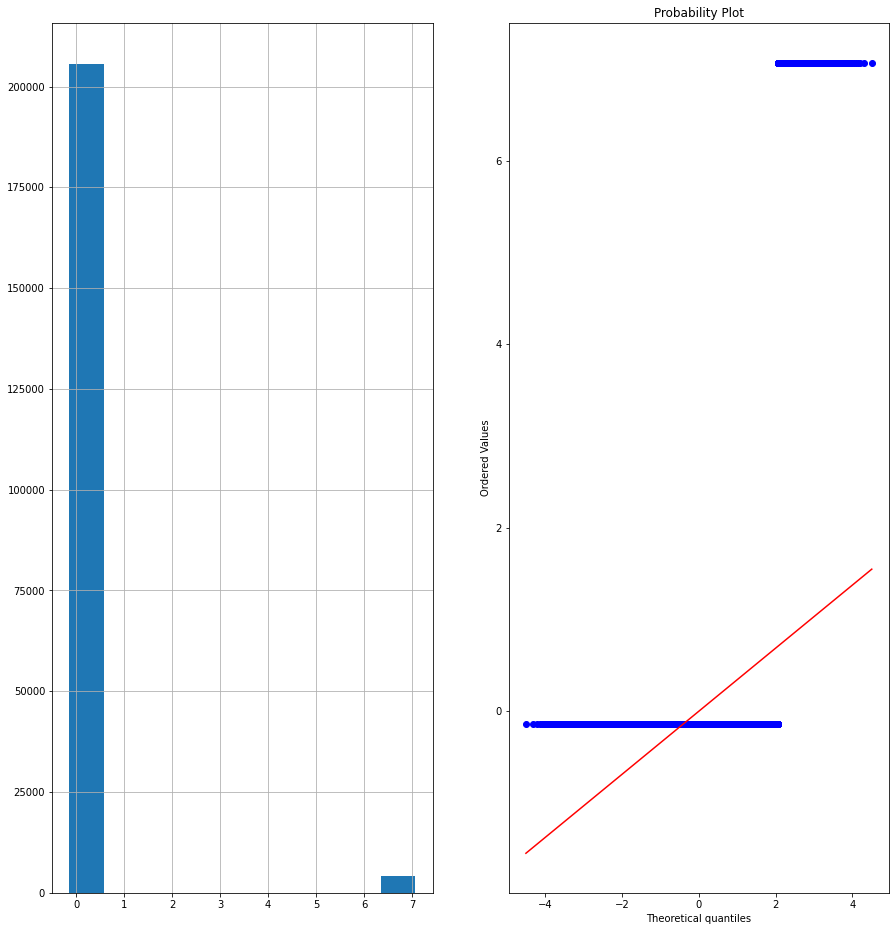

fr_da_rech30


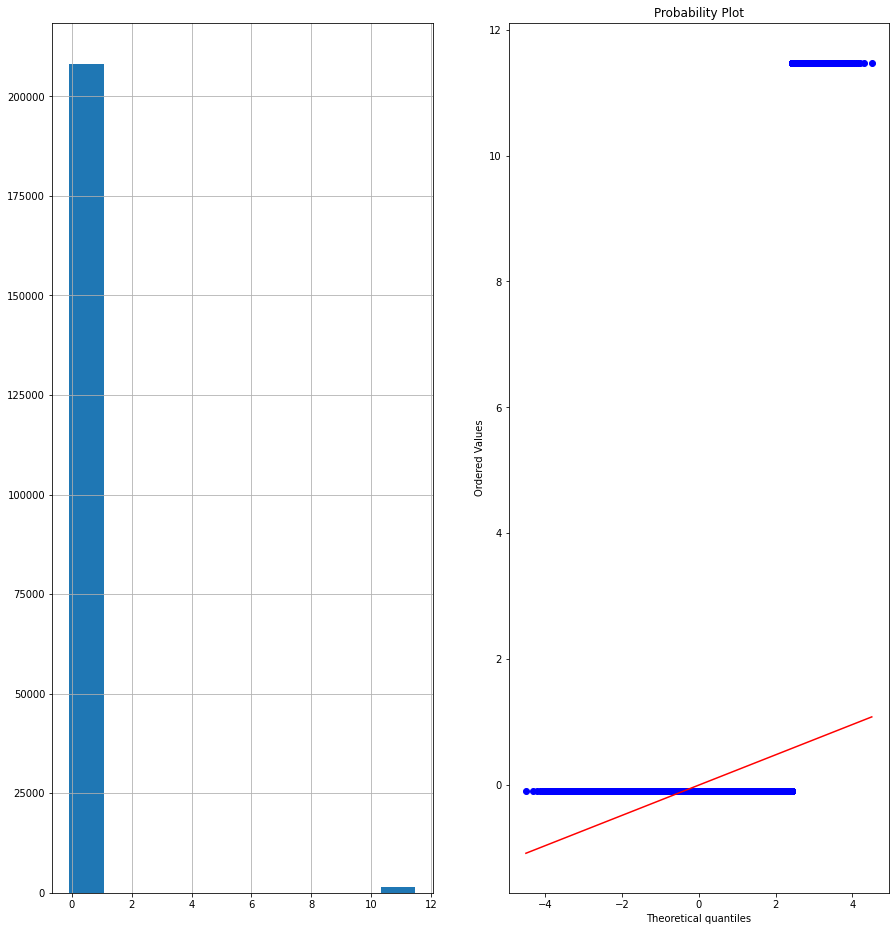

cnt_da_rech90


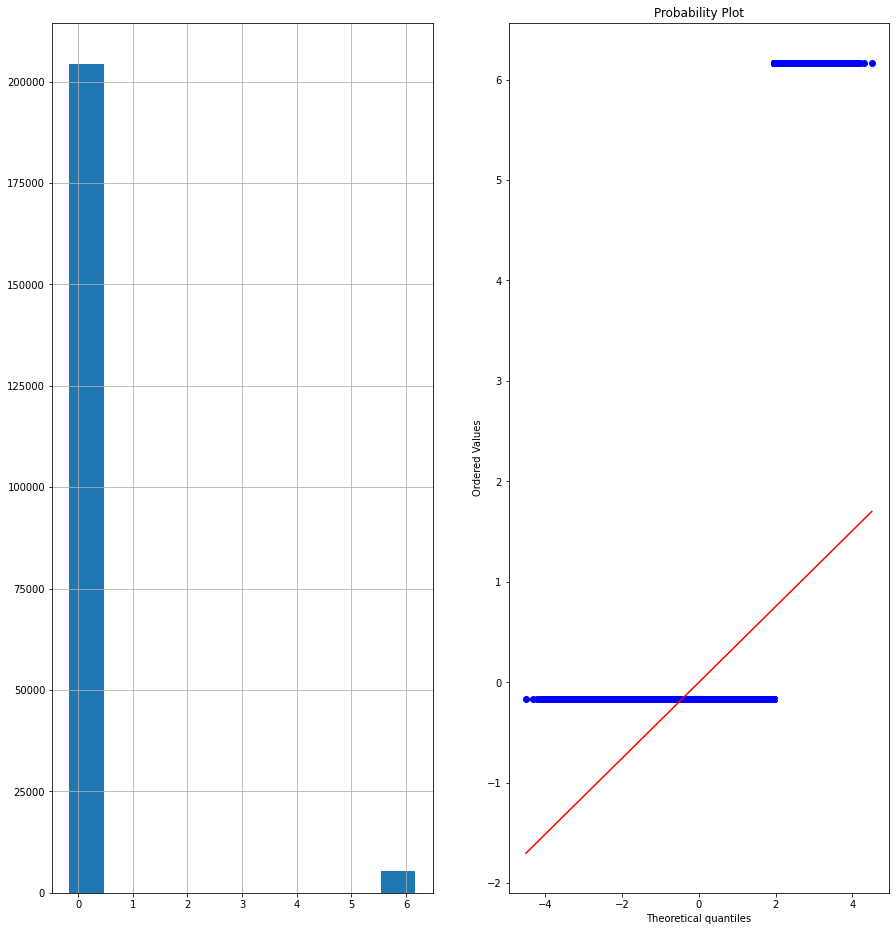

fr_da_rech90


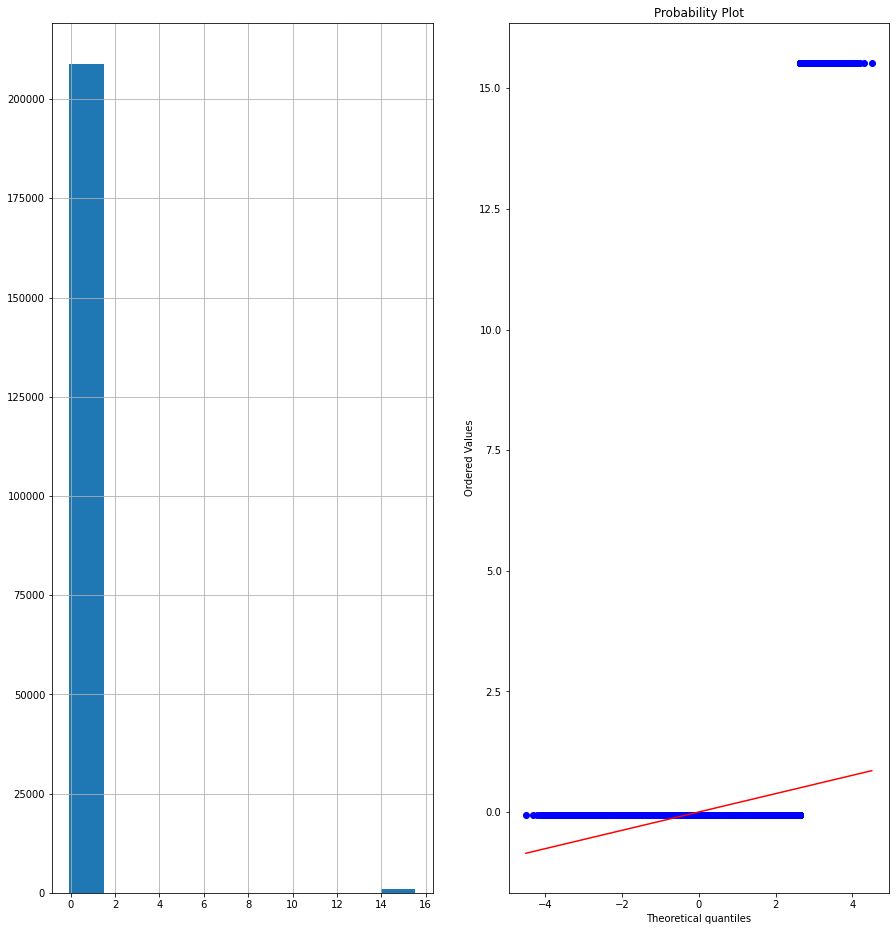

cnt_loans30


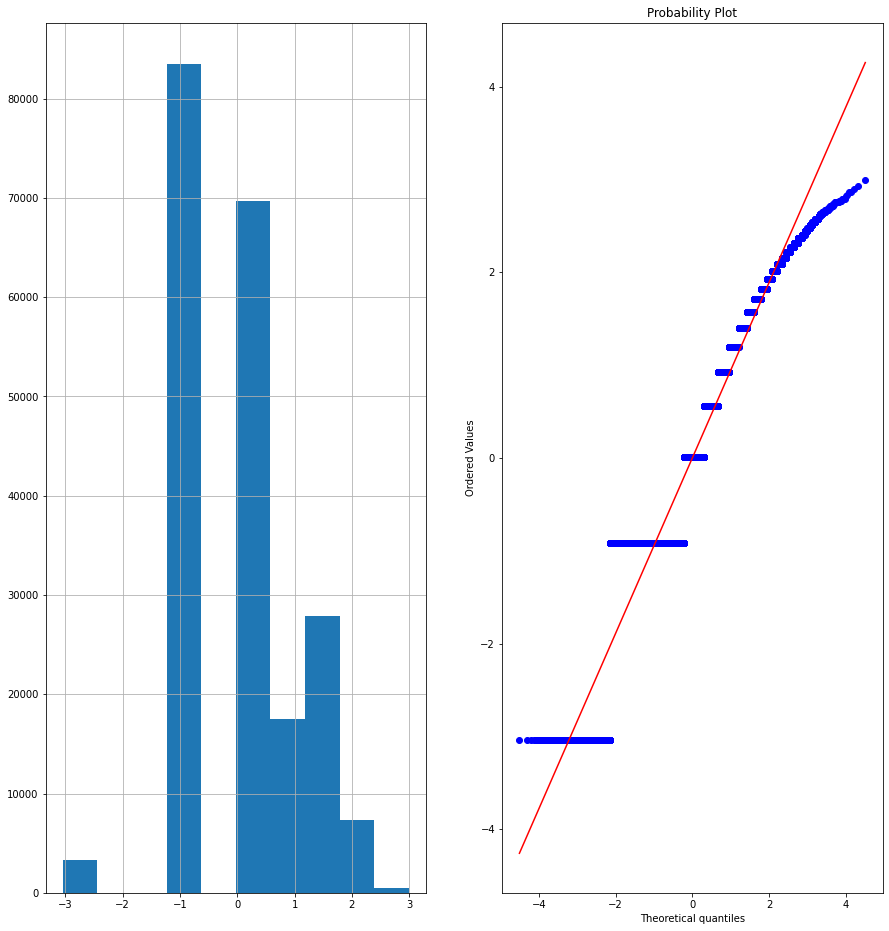

amnt_loans30


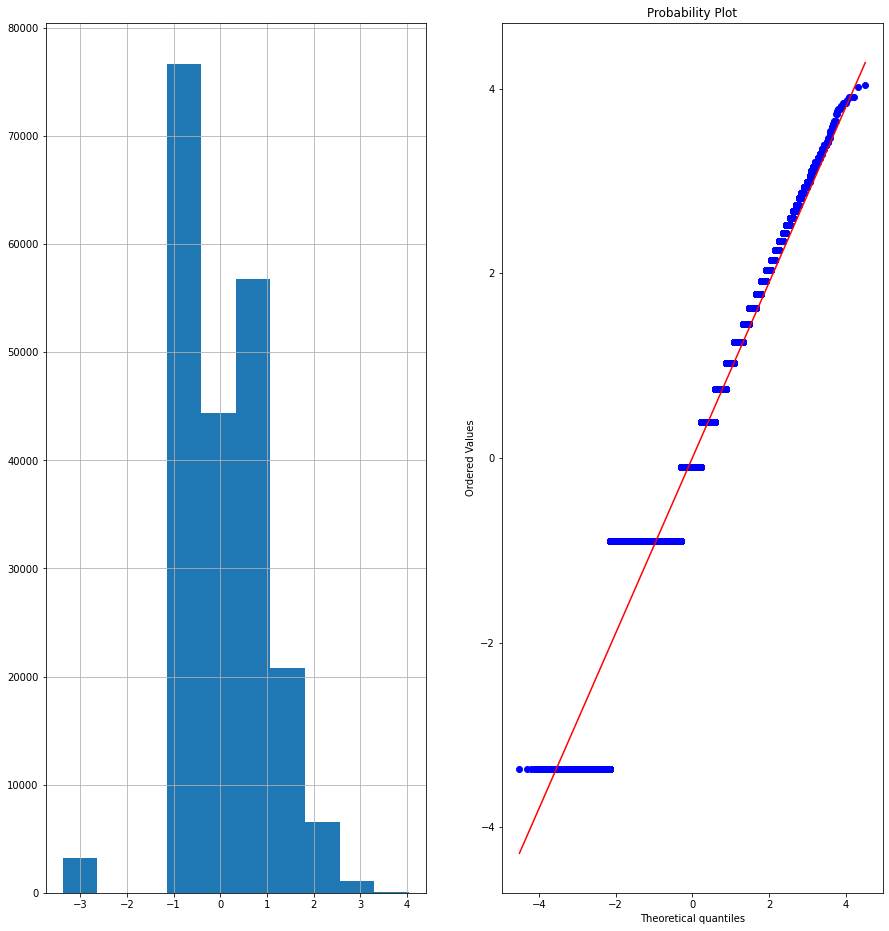

cnt_loans90


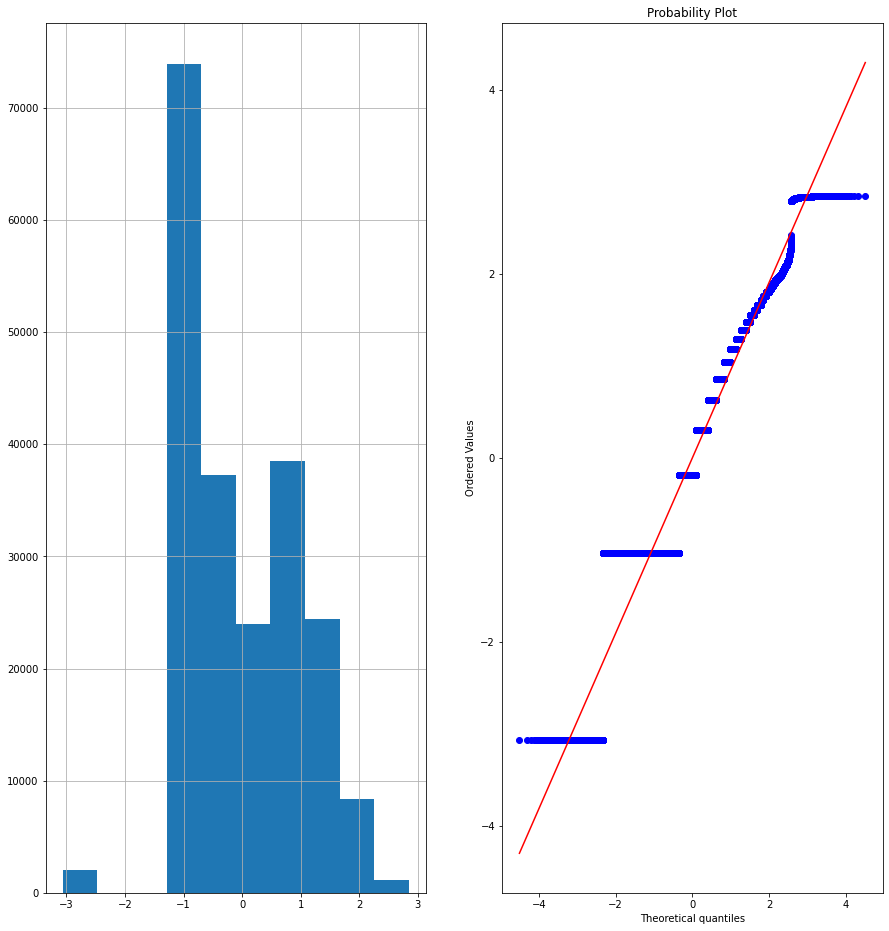

amnt_loans90


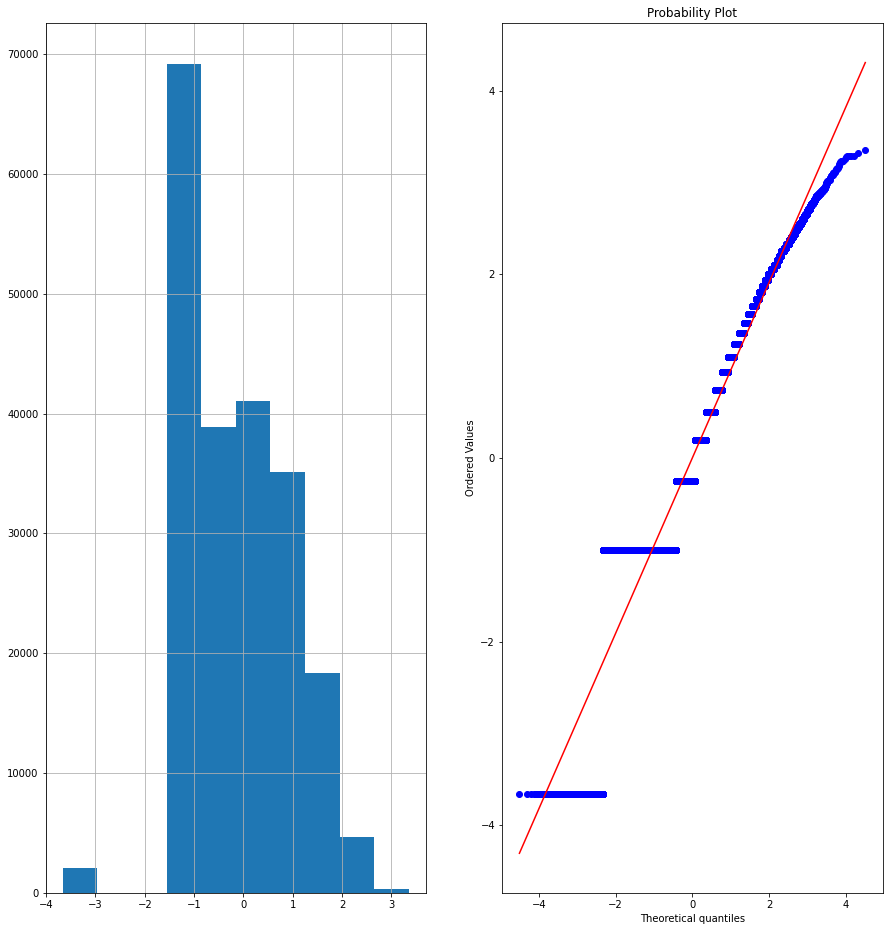

payback30


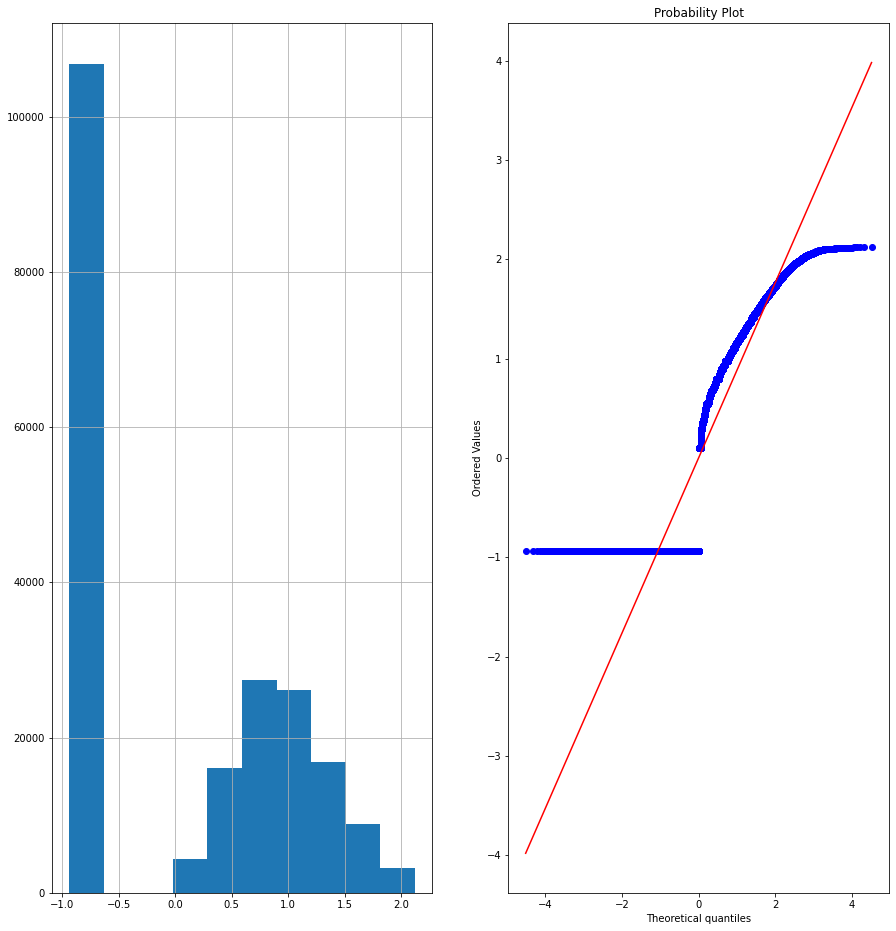

payback90


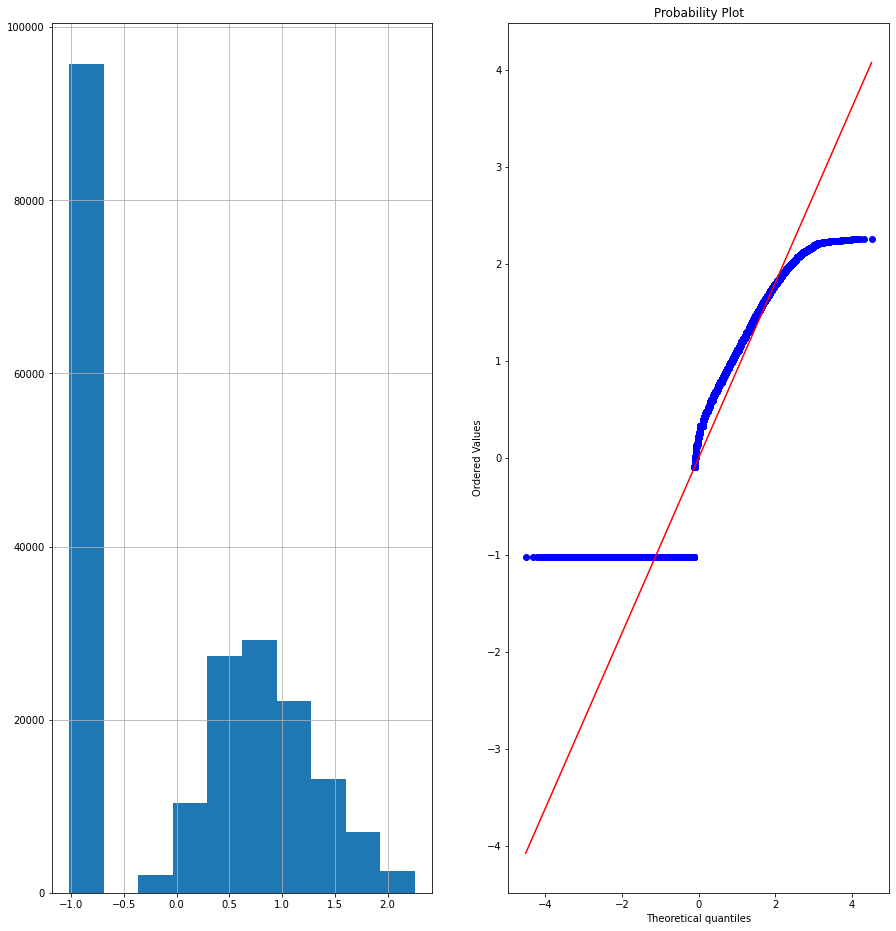

In [449]:

for col in continuous_data:
    print(col)
    diagnostic_plots(df, col)
    

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  float64
 9   cnt_ma_rech30         209593 non-null  float64
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  float64
 15  

In [451]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

We can see all the continuous data columns are normalised now.

###### Checking Outliers:

    Lets look into the continuous data and check if there are outliers. There are 28 continuous type of columns. Its difficult to understand the plots if we include all the boxplots in one plot or creating a boxplot for each column. Hence lets split them into 7 and plot the box plots for easier understanding.

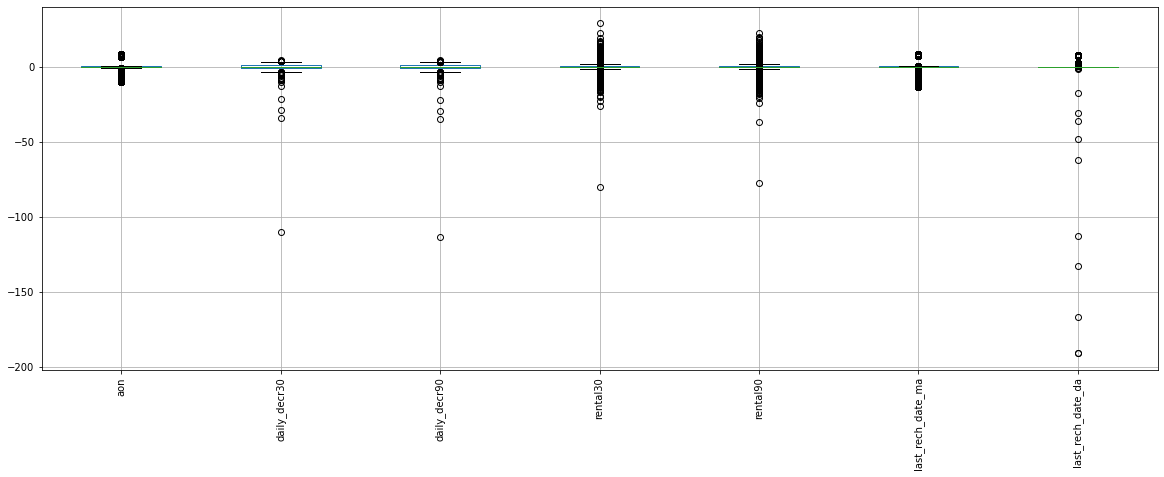

In [452]:
#Lets plot first 18 columns 
df[continuous_data].iloc[:,0:7].boxplot(figsize=[20,8])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

In [457]:
df.keys()

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

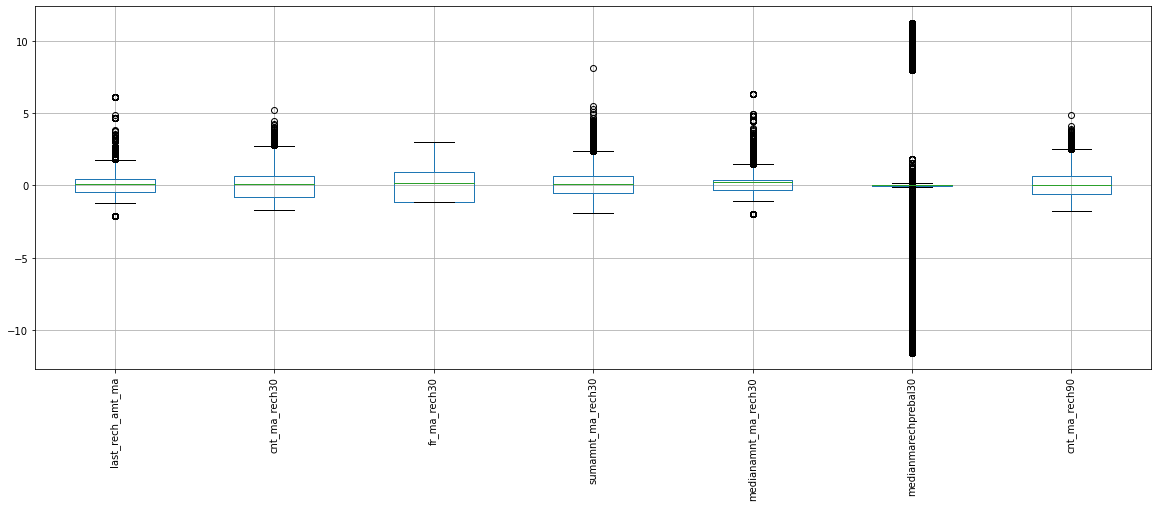

In [453]:
#Lets plot first 18 columns 
df[continuous_data].iloc[:,7:14].boxplot(figsize=[20,8])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

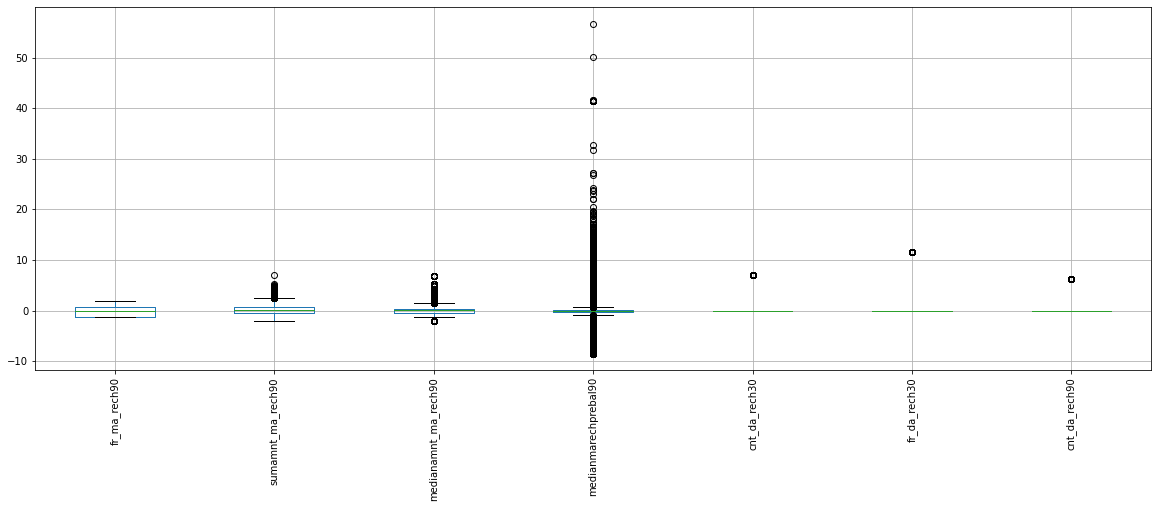

In [454]:
#Lets plot first 18 columns 
df[continuous_data].iloc[:,14:21].boxplot(figsize=[20,8])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

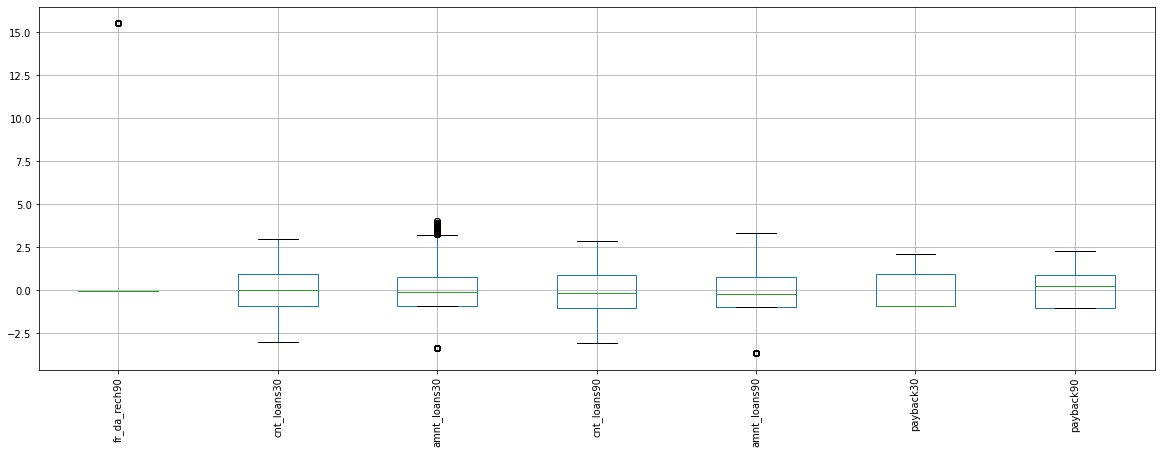

In [455]:
#Lets plot first 18 columns 
df[continuous_data].iloc[:,21:30].boxplot(figsize=[20,8])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

We can see below columns from continuous data has outliers.

aon,daily_decr30,daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, amnt_loans30, amnt_loans90         


In [458]:
df.shape

(209593, 32)

In [459]:
#function to detect Outliers when features are normally destributed (Zscore):


def Outlier(dataframe, col):
    lower_limit=dataframe[col].mean()-3*dataframe[col].std()
    upper_limit=dataframe[col].mean()+3*dataframe[col].std()
    return(lower_limit, upper_limit)

In [460]:
#function to detect when the features are skewed (IQR):


def Outlier_IQR(dataframe, col):
    IQR=dataframe[col].quantile(0.75)-dataframe[col].quantile(0.25)
    lower_lim=dataframe[col].quantile(0.25)-(IQR*1.5)
    upper_lim=dataframe[col].quantile(0.75)+(IQR*1.5)
    return (lower_lim, upper_lim)

In [461]:
#daily_decr30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'daily_decr30')

(-3.000007156753317, 3.000007156753317)

In [462]:
df[df['daily_decr30']>3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
6162,1,0.124836,3.588506,3.555758,4.546532,4.226734,-0.058426,-0.074007,2.310226,2.241117,-0.239912,4.467410,2.449047,0.004978,2.340171,-0.446020,4.774675,2.570364,-0.184514,-0.141497,-0.087125,-0.162110,-0.064375,2.445785,3.652229,0.0,2.168221,3.049046,12,0.0,0.351693,0.260800
7960,1,0.092347,3.109663,2.937371,2.966421,2.933481,-0.058426,-0.074007,2.310226,2.177950,0.188872,4.076699,2.449047,0.073550,2.426235,-0.446020,4.371859,2.570364,0.085428,-0.141497,-0.087125,-0.162110,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,0.351693,0.146747
12680,1,-0.221625,3.359435,3.551853,3.222820,4.304848,-0.058426,-0.074007,2.310226,3.643612,-1.128949,4.019661,0.208594,0.116654,4.089709,-1.207069,4.577330,0.146193,0.823218,-0.141497,-0.087125,-0.162110,-0.064375,2.574368,3.904216,0.0,2.278639,3.287237,12,0.0,0.299942,0.069994
16393,1,0.222247,3.067726,2.896115,0.353139,-10.044207,-0.058426,-0.074007,4.650152,0.384542,0.188872,2.350014,1.991349,-0.020917,-0.005732,-0.060965,1.774738,2.072082,-0.231204,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-0.186805,-0.250850,6,0.0,1.607174,1.511556
16701,1,0.199364,3.545937,3.547889,2.394478,2.147711,-0.025513,-0.074007,1.051183,2.939167,-0.239912,3.951257,1.179256,0.015421,2.740254,-0.446020,3.962803,1.191484,-0.007851,-0.141497,-0.087125,-0.162110,-0.064375,2.651010,4.040553,0.0,2.062363,3.031597,12,0.0,0.229315,0.028941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188900,1,-0.112025,3.017343,3.029557,2.853179,2.581906,-0.058426,1.859043,1.961222,2.111545,-0.239912,3.591208,2.096402,0.073472,1.914607,-0.446020,3.526759,2.186333,0.221932,-0.141497,-0.087125,6.168644,-0.064375,2.215579,3.250754,0.0,1.928929,2.687690,12,0.0,0.338858,0.933821
189257,1,-0.290776,3.215875,3.433529,1.578771,1.828199,-0.025513,-0.074007,1.289040,1.716272,0.188872,3.392109,2.096402,0.081135,2.398239,-0.446020,4.031314,1.682267,-0.206183,-0.141497,-0.087125,-0.162110,-0.064375,1.824646,2.519799,0.0,1.715554,2.203915,12,0.0,0.615723,0.379231
190885,1,0.047322,3.209892,3.024750,2.089978,1.307397,-0.025513,-0.074007,2.687866,2.041553,-0.239912,4.202984,2.740425,0.153210,1.825852,-1.207069,3.934149,2.888234,1.467615,-0.141497,-0.087125,-0.162110,-0.064375,1.824646,1.911755,0.0,1.393855,1.466417,12,0.0,0.160127,-0.036863
193084,1,0.027916,3.903420,3.904351,4.017470,3.553114,-0.058426,-0.074007,2.310226,2.659089,-0.239912,4.639229,2.449047,0.000884,2.581564,-0.446020,4.372238,1.191484,-0.107090,-0.141497,-0.087125,-0.162110,-0.064375,2.545465,3.845535,0.0,2.244014,3.287237,12,0.0,0.415195,0.285309


In [463]:
df[df['daily_decr30']<-3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
3968,1,0.121542,-4.516400,-4.550340,0.091579,-0.046824,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
11228,1,0.107186,-8.620746,-8.732157,-0.007250,-0.124625,0.228286,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,-0.004077,-0.577409,1.673478,0.266315,1.453325,-0.157565,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
11238,1,-0.107623,-3.766086,-3.787353,-0.381814,-0.420846,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
13953,0,-0.361002,-3.055441,-3.513711,0.250109,0.137008,0.228286,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,-0.063971,-1.027906,-1.207069,-0.086685,1.682267,-0.399841,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
20442,1,-0.253319,-4.082764,-4.109298,-0.192117,-0.270508,0.322503,-0.074007,0.087772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.027906,-1.207069,-0.758385,0.150862,0.279218,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
21391,1,-0.364027,-4.697156,-4.734242,-0.403469,-0.438066,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
31704,1,0.170519,-7.589800,-7.680780,-0.092551,-0.191875,0.154056,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,-0.017977,-1.027906,-1.207069,-0.086685,1.682267,-0.215752,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
34714,0,0.034243,-5.079974,-5.123827,-0.064135,-0.169461,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
35457,0,-0.038214,-5.210496,-5.256687,0.453313,0.237108,0.184477,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,-0.050400,-1.027906,-1.207069,-0.086685,1.682267,-0.360136,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
37420,1,0.137488,-21.932773,-22.338349,7.460140,5.650573,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.141497,-0.087125,-0.162110,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917


In [464]:
df['daily_decr30'].median()

0.012176060046857288

In [465]:
#in daily_decr30, more than -3 to 3 are considered as outliers. Let us fill them by the median value.

df.loc[df['daily_decr30']>3, 'daily_decr30']=df['daily_decr30'].median()

In [466]:
df[df['daily_decr30']>=3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90


In [467]:
df.loc[df['daily_decr30']<-3, 'daily_decr30']=df['daily_decr30'].median() #values <-3 are filled by median()

In [468]:
df[df['daily_decr30']<=-3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90


In [469]:
# daily_decr90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'daily_decr90')

(-3.000007156752999, 3.000007156753)

In [470]:
#in daily_decr90, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['daily_decr90']>3, 'daily_decr90']=df['daily_decr90'].median()
df.loc[df['daily_decr90']<-3, 'daily_decr90']=df['daily_decr90'].median()

In [471]:
# rental30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'rental30')

(-3.000007156753121, 3.000007156753121)

In [472]:
df['rental30'].median()

-0.31477034710955015

In [473]:
#in rental30, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['rental30']>3, 'rental30']=df['rental30'].median()
df.loc[df['rental30']<-3, 'rental30']=df['rental30'].median()

In [474]:
# rental90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'rental90')

(-3.0000071567532927, 3.0000071567532927)

In [475]:
#in rental90, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['rental90']>3, 'rental90']=df['rental90'].median()
df.loc[df['rental90']<-3, 'rental90']=df['rental90'].median()

In [476]:
# last_rech_date_da seems to be normally distributed, lets detect the outliers:

Outlier(df, 'last_rech_date_da')

(-3.0000071567574205, 3.000007156757424)

In [477]:
df['last_rech_date_da'].median()

-0.07400702792535203

In [478]:
#in last_rech_date_da, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['last_rech_date_da']>3, 'last_rech_date_da']=df['last_rech_date_da'].median()
df.loc[df['last_rech_date_da']<-3, 'last_rech_date_da']=df['last_rech_date_da'].median()

In [479]:
# last_rech_amt_ma seems to be normally distributed, lets detect the outliers:

Outlier(df, 'last_rech_amt_ma')

(-3.0000071567520816, 3.0000071567520834)

In [480]:
df['last_rech_amt_ma'].median()

0.08341678877297397

In [481]:
#in last_rech_amt_ma, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['last_rech_amt_ma']>3, 'last_rech_amt_ma']=df['last_rech_amt_ma'].median()
df.loc[df['last_rech_amt_ma']<-3, 'last_rech_amt_ma']=df['last_rech_amt_ma'].median()

In [482]:
df['cnt_ma_rech30'].median()

0.09612025601738937

In [483]:
# cnt_ma_rech30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'cnt_ma_rech30')

(-3.0000071567528375, 3.0000071567528357)

In [484]:
#in cnt_ma_rech30, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['cnt_ma_rech30']>3, 'cnt_ma_rech30']=df['cnt_ma_rech30'].median()
df.loc[df['cnt_ma_rech30']<-3, 'cnt_ma_rech30']=df['cnt_ma_rech30'].median()

In [485]:
df['sumamnt_ma_rech30'].median()

0.07025812563818307

In [486]:
# sumamnt_ma_rech30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'sumamnt_ma_rech30')

(-3.000007156753606, 3.0000071567536035)

In [487]:
#in sumamnt_ma_rech30, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['sumamnt_ma_rech30']>3, 'sumamnt_ma_rech30']=df['sumamnt_ma_rech30'].median()
df.loc[df['sumamnt_ma_rech30']<-3, 'sumamnt_ma_rech30']=df['sumamnt_ma_rech30'].median()

In [488]:
df['medianamnt_ma_rech30'].median()

0.2085942332270695

In [489]:
# medianamnt_ma_rech30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'medianamnt_ma_rech30')

(-3.0000071567523587, 3.0000071567523605)

In [490]:
#in medianamnt_ma_rech30, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['medianamnt_ma_rech30']>3, 'medianamnt_ma_rech30']=df['medianamnt_ma_rech30'].median()
df.loc[df['medianamnt_ma_rech30']<-3, 'medianamnt_ma_rech30']=df['medianamnt_ma_rech30'].median()

In [491]:
df['cnt_ma_rech90'].median()

-0.005732053157215001

In [492]:
# cnt_ma_rech90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'cnt_ma_rech90')

(-3.000007156751081, 3.0000071567510784)

In [493]:
#in cnt_ma_rech90, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['cnt_ma_rech90']>3, 'cnt_ma_rech90']=df['cnt_ma_rech90'].median()
df.loc[df['cnt_ma_rech90']<-3, 'cnt_ma_rech90']=df['cnt_ma_rech90'].median()

In [494]:
df['sumamnt_ma_rech90'].median()

0.05397785403570668

In [495]:
# sumamnt_ma_rech90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'sumamnt_ma_rech90')

(-3.000007156754375, 3.000007156754374)

In [496]:
#in sumamnt_ma_rech90, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['sumamnt_ma_rech90']>3, 'sumamnt_ma_rech90']=df['sumamnt_ma_rech90'].median()
df.loc[df['sumamnt_ma_rech90']<-3, 'sumamnt_ma_rech90']=df['sumamnt_ma_rech90'].median()

In [497]:
df['medianamnt_ma_rech90'].median()

0.14619315896527374

In [498]:
# medianamnt_ma_rech90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'medianamnt_ma_rech90')

(-3.0000071567501476, 3.0000071567501485)

In [499]:
#in medianamnt_ma_rech90, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['medianamnt_ma_rech90']>3, 'medianamnt_ma_rech90']=df['medianamnt_ma_rech90'].median()
df.loc[df['medianamnt_ma_rech90']<-3, 'medianamnt_ma_rech90']=df['medianamnt_ma_rech90'].median()

In [501]:
df['medianmarechprebal90'].median()

-0.13721182243962188

In [502]:
# medianmarechprebal90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'medianmarechprebal90')

(-3.0000071567522735, 3.0000071567522735)

In [503]:
#in medianmarechprebal90, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['medianmarechprebal90']>3, 'medianmarechprebal90']=df['medianmarechprebal90'].median()
df.loc[df['medianmarechprebal90']<-3, 'medianmarechprebal90']=df['medianmarechprebal90'].median()

In [506]:
df['amnt_loans30'].median(), df['amnt_loans30'].min(), df['amnt_loans30'].max(), 

(-0.09756296283612864, -3.3736309977651344, 4.040552670973789)

In [507]:
# amnt_loans30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'amnt_loans30')

(-3.000007156751395, 3.0000071567513986)

In [508]:
#in amnt_loans30, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['amnt_loans30']>3, 'amnt_loans30']=df['amnt_loans30'].median()
df.loc[df['amnt_loans30']<-3, 'amnt_loans30']=df['amnt_loans30'].median()

In [510]:
df['amnt_loans90'].median(),df['amnt_loans90'].min(),df['amnt_loans90'].max()

(-0.2508501578979374, -3.6605852912913774, 3.3493441597513915)

In [337]:
#in payback90, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['payback90']>3, 'payback90']=df['payback90'].median()
df.loc[df['payback90']<-3, 'payback90']=df['payback90'].median()

In [511]:
df['last_rech_date_ma'].mode(), df['last_rech_date_ma'].min(), df['last_rech_date_ma'].max(), df['last_rech_date_ma'].median() 

(0   -0.058426
 dtype: float64,
 -13.753311102196022,
 8.695886440611352,
 4.358509521705989e-05)

In [514]:
df['last_rech_date_ma'].value_counts(), 

(-0.058426    47343
 -0.025513    26665
 -0.107221    20743
  0.000044    19984
  0.021231    15452
              ...  
  8.371601        1
  7.644520        1
  8.345219        1
  8.304676        1
  8.472854        1
 Name: last_rech_date_ma, Length: 1186, dtype: int64,)

In [526]:
df['last_rech_date_ma'].isnull().sum() 

0

In [519]:
# last_rech_date_ma seems to be normally distributed, lets detect the outliers:

Outlier(df, 'last_rech_date_ma')

(-3.0000071567529436, 3.000007156752941)

In [527]:
(df['last_rech_date_ma']>3).sum()

0

In [528]:
(df['last_rech_date_ma']<-3).sum()

0

In [523]:
#in last_rech_date_ma, from -3 to 3 are considered to be outliers. Lets replace these values by the mode.

df.loc[df['last_rech_date_ma']>3, 'last_rech_date_ma']=-0.058426
df.loc[df['last_rech_date_ma']<-3, 'last_rech_date_ma']=-0.058426

In [525]:
df['last_rech_date_ma'].value_counts()

-0.058426    47343
-0.025513    26665
-0.107221    20743
 0.000044    19984
 0.021231    15452
             ...  
 0.479745        1
 0.471504        1
 0.477706        1
 0.487762        1
 0.452057        1
Name: last_rech_date_ma, Length: 122, dtype: int64

In [537]:
df['medianmarechprebal30'].median()

-0.006130157576685599

In [530]:
df['medianmarechprebal30'].min()

-11.577371064092382

In [531]:
df['medianmarechprebal30'].max()

11.254923461762724

In [532]:
df['medianmarechprebal30'].isnull().sum()

0

In [533]:
# medianmarechprebal30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'medianmarechprebal30')

(-3.000007156752725, 3.000007156752725)

In [534]:
df['medianmarechprebal30'].value_counts()

-0.063971     30680
-0.021681      1108
-0.022979      1091
-0.025676      1060
-0.036573      1045
              ...  
 0.254184         1
-0.017297         1
 10.736368        1
-6.889250         1
 0.095288         1
Name: medianmarechprebal30, Length: 23907, dtype: int64

In [538]:
#in medianmarechprebal30, from -3 to 3 are considered to be outliers. Lets replace these values by the mode.

df.loc[df['medianmarechprebal30']>3, 'medianmarechprebal30']=-0.063971
df.loc[df['medianmarechprebal30']<-3, 'medianmarechprebal30']=-0.063971

In [539]:
df['cnt_da_rech30'].median()

-0.14149738764491793

In [540]:
df['cnt_da_rech30'].max()

7.067378622861505

In [541]:
df['cnt_da_rech30'].mode()

0   -0.141497
dtype: float64

In [542]:
# cnt_da_rech30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'cnt_da_rech30')

(-3.0000071567543616, 3.0000071567543847)

In [543]:
df['cnt_da_rech30'].value_counts()

-0.141497    205479
 7.067184      2331
 7.067379      1067
 7.067378       372
 7.067379       156
 7.067379        86
 7.067379        34
 7.067379        27
 7.067379        20
 7.067379        12
 7.067379         9
Name: cnt_da_rech30, dtype: int64

In [356]:
data['cnt_da_rech30'].value_counts()

0.00000        205479
1.00000          2331
2.00000           372
3.00000           156
4.00000            86
                ...  
45328.17301         1
53362.91409         1
51980.53032         1
19915.01087         1
74640.92957         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

In [544]:
#Lets remove cnt_da_rech30 feature as this has majority of 0 recharges done in last 30 days and does not have any correlation with our target variable.
df.drop(['cnt_da_rech30'], axis=1, inplace=True)

In [545]:
# fr_da_rech30 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'fr_da_rech30')

(-3.0000071567604425, 3.0000071567604505)

In [547]:
df['fr_da_rech30'].min(), df['fr_da_rech30'].max(), df['fr_da_rech30'].median(), df['fr_da_rech30'].mode()

(-0.08712539945992652,
 11.477736738433267,
 -0.08712539945992652,
 0   -0.087125
 dtype: float64)

In [553]:
df['fr_da_rech30'].isnull().sum()

0

In [548]:
print(df['fr_da_rech30'].min(), df['fr_da_rech30'].max(), df['fr_da_rech30'].median(), df['fr_da_rech30'].mode(), df['fr_da_rech30'].quantile(0.75))

-0.08712539945992652 11.477736738433267 -0.08712539945992652 0   -0.087125
dtype: float64 -0.08712539945992652


In [551]:
#in cnt_da_rech30, from -3 to 3 are considered to be outliers. Lets replace these values by the median.

df.loc[df['fr_da_rech30']>3, 'fr_da_rech30']=df['fr_da_rech30'].median()

In [552]:
# cnt_da_rech90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'cnt_da_rech90')

(-3.0000071567580537, 3.0000071567580484)

In [554]:
df['cnt_da_rech90'].min(), df['cnt_da_rech90'].max(), df['cnt_da_rech90'].mean(), df['cnt_da_rech90'].mode(), df['cnt_da_rech90'].median()

(-0.16211017775986386,
 6.1686441518886745,
 -2.832624983874934e-15,
 0   -0.16211
 dtype: float64,
 -0.16211017775986386)

In [559]:
df['cnt_da_rech90'].value_counts()

-0.162110    204226
 6.168644      4173
 6.168644      1194
Name: cnt_da_rech90, dtype: int64

In [374]:
df['fr_da_rech90'].min(), df['fr_da_rech90'].max(), df['fr_da_rech90'].mean(), df['fr_da_rech90'].mode(), df['fr_da_rech90'].median()

(-0.06437506756129673,
 15.533964279692885,
 5.7672568363365555e-15,
 0   -0.064375
 dtype: float64,
 -0.06437506756129673)

In [560]:
# fr_da_rech90 seems to be normally distributed, lets detect the outliers:

Outlier(df, 'fr_da_rech90')

(-3.0000071567612543, 3.000007156761266)

In [561]:
df['fr_da_rech90'].value_counts()

-0.064375     208728
 15.533964       865
Name: fr_da_rech90, dtype: int64

There are only 2 values after handling the skewness this can be ignored

In [569]:
#aon seems to be skewed, lets detect the outliers:

Outlier(df, 'aon')

(-3.0000071567531625, 3.0000071567531625)

In [568]:
df['aon'].min(), df['aon'].max(), df['aon'].median(), df['aon'].mode()

(-10.482958581088887,
 8.704811639989874,
 -0.03821368314637707,
 0   -0.341067
 dtype: float64)

In [570]:
df[df['aon']>3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
65,1,8.468410,0.481741,0.443259,0.885357,0.640021,0.204453,-0.074007,0.777177,-0.799355,-1.128949,-0.159539,0.903883,0.196164,-0.577409,1.255669,-0.028387,0.894046,0.853411,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
157,1,8.225418,-1.043594,-1.034670,-0.635188,-0.623733,0.000044,-0.074007,-0.432065,0.096120,0.188872,-0.484066,-0.305859,-0.016661,0.373347,-0.060965,-0.596215,-1.203334,-0.125226,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,0.5,-0.186805,-0.250850,6,0.5,0.799201,0.595292
308,1,7.592410,-1.201687,-1.191009,-0.337524,-0.385671,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
487,1,7.345984,0.369676,0.335446,-0.632734,-0.619730,0.145583,-0.074007,2.598259,-0.799355,-1.128949,0.775437,2.740425,0.169802,-1.027906,-1.207069,0.403500,2.888234,1.416005,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,-0.937405,-1.018917
581,1,8.268078,-0.568211,-0.569923,-0.673460,-0.655122,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.087125,-0.16211,-0.064375,-0.913019,-0.097563,2.0,-1.034294,-0.250850,12,2.0,-0.937405,-1.018917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209022,1,6.700860,-1.229896,-1.219041,-0.466262,-0.488084,-0.058426,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,0.032776,-1.027906,-1.207069,-0.086685,1.682267,0.110199,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,0.094998,-0.098305
209155,1,8.568980,1.168716,1.290161,2.217201,2.289313,0.162147,-0.074007,1.051183,-0.799355,-1.128949,-0.014618,1.179256,0.024614,0.657800,-0.060965,1.413460,1.191484,-0.184027,-0.087125,-0.16211,-0.064375,-3.042030,-0.097563,0.0,-0.186805,-0.250850,6,0.0,-0.937405,0.779916
209327,1,8.011945,-1.047560,-1.038578,-0.626894,-0.617004,0.039482,-0.074007,0.083417,-0.275617,0.795175,-0.334622,-0.019632,-0.033171,-0.577409,0.509415,-0.580393,-0.098149,-0.290842,-0.087125,-0.16211,-0.064375,0.556347,0.393236,0.0,0.300689,0.192260,6,0.0,0.539185,0.331034
209439,0,7.080233,-1.238546,-1.227647,-0.667042,-0.649775,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917


In [571]:
df[df['aon']<-3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
30,1,-8.570282,-1.136238,-1.126141,-0.401815,-0.436750,-0.058426,-0.074007,-0.429509,-0.275617,1.217735,-0.745068,-0.598215,-0.055979,-0.256024,1.540588,-0.512110,-0.400935,-0.395830,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,1.0,-1.034294,-1.005714,6,1.0,-0.937405,-1.018917
197,1,-6.823974,-0.972092,-0.964317,-0.185625,-0.265376,-0.058426,-0.074007,0.083417,-0.799355,-1.128949,-0.535362,0.208594,-0.047115,-1.027906,-1.207069,-0.760548,0.146193,-0.348388,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
322,1,-7.103112,-1.132786,-1.122725,-0.586948,-0.584745,-0.058426,-0.074007,-0.432065,-0.275617,1.470633,-0.746338,-0.599957,-0.032684,-0.577409,1.193098,-0.950862,-0.716297,-0.288625,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
504,1,-6.823974,-1.108130,-1.098347,-0.651914,-0.637354,-0.058426,-0.074007,-0.432065,-0.799355,-1.128949,-0.824876,-0.305859,-0.039527,-1.027906,-1.207069,-1.021996,-0.403647,-0.318537,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,2.836261,-1.005714,6,0.0,-0.937405,-1.018917
603,1,-6.549702,-1.098487,-1.088821,-0.116016,-0.210393,-0.058426,-0.074007,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.030189,-1.027906,-1.207069,-0.760548,0.146193,0.091135,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208617,1,-10.482959,-1.243874,-1.232950,-0.658395,-0.642658,0.055605,-0.074007,0.282654,-0.799355,-1.128949,-0.425986,0.407960,0.017636,-1.027906,-1.207069,-0.662284,0.360127,0.002134,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,0.799201,0.595292
208662,1,-9.827401,-1.263903,-1.252900,-0.669445,-0.651766,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.791393,-1.207069,-2.025016,-2.134869,-0.399841,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
208716,1,-6.280343,-1.044525,-1.035587,-0.421591,-0.452487,-0.058426,-0.074007,-0.429509,-0.799355,-1.128949,-0.823415,-0.303313,-0.048031,-1.027906,-1.207069,-1.020671,-0.400935,-0.351740,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
209240,1,-4.770243,-1.116561,-1.106680,-0.613005,-0.605763,-0.058426,-0.074007,-0.432065,-0.799355,-1.128949,-0.824876,-0.305859,0.011540,-1.027906,-1.207069,-1.021996,-0.403647,-0.038917,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917


In [572]:
df['aon'].median()

-0.03821368314637707

In [573]:
#in aon, from -0.7 to 0.7 are considered to be outliers. Lets replace these values by the median.

df.loc[df['aon']>3, 'aon']=df['aon'].median()
df.loc[df['aon']<-3, 'aon']=df['aon'].median()

In [574]:
df[df['aon']>3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90


In [577]:
df[df['aon']<-3]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
846,0,-2.339620,0.033676,0.011389,-0.212281,-0.267164,-0.058426,-0.074007,0.083417,-0.799355,-1.128949,-0.535362,0.208594,-0.022979,-1.027906,-1.207069,-0.760548,0.146193,-0.241781,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
4932,0,-2.509609,-0.426907,-0.432550,0.251109,0.115188,-0.058426,-0.074007,-0.432065,-0.799355,-1.128949,-0.824876,-0.305859,0.039854,-1.027906,-1.207069,-1.021996,-0.403647,0.163584,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
8341,1,-2.339620,-0.374064,-0.381268,-0.105431,-0.162423,-0.058426,-0.074007,-0.432065,-0.275617,1.217735,-0.535061,-0.305859,-0.063971,-0.005732,1.510355,-0.673213,-0.716297,-0.137212,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
10250,0,-2.176017,-0.258033,-0.269581,-0.627576,-0.617557,-0.058426,-0.074007,-0.429509,-0.799355,-1.128949,-0.823415,-0.303313,-0.034836,-0.577409,-1.207069,-0.758655,-0.400935,-0.298323,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
12224,1,-2.509609,0.033676,0.011389,-0.588005,-0.585596,-0.058426,-0.074007,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.012247,-1.027906,-1.207069,-0.760548,0.146193,-0.034230,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201891,0,-2.176017,-0.237180,-0.249452,-0.471045,-0.474784,-0.058426,-0.074007,-0.432065,-0.799355,-1.128949,-0.824876,-0.305859,-0.036697,-0.577409,-1.207069,-0.760277,-0.403647,-0.306498,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
203580,1,-2.018938,-0.511738,-0.515071,0.648430,0.514942,-0.058426,-0.074007,-0.429509,-0.799355,-1.128949,-0.823415,-0.303313,0.019097,-0.577409,1.618975,-0.949714,-0.714449,-0.128634,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,1.0,-1.034294,-1.005714,6,1.0,-0.937405,-1.018917
204400,1,-2.509609,-0.258033,-0.269581,-0.626360,-0.616571,-0.058426,-0.074007,-0.432065,-0.799355,-1.128949,-0.824876,-0.305859,-0.031569,-1.027906,-1.207069,-1.021996,-0.403647,-0.283499,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
205908,0,-2.685858,-0.426741,-0.432550,0.331202,0.163730,-0.058426,-0.074007,-0.429509,-0.275617,0.188872,-0.533257,-0.303313,0.007665,-0.577409,-0.060965,-0.758655,-0.400935,-0.064242,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917


In [578]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,-0.177906,0.208594,-0.041301,-0.577409,1.335401,-0.440305,0.146193,-0.325841,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,1.813266,1.783964
1,1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,0.016926,-1.027906,-1.207069,-0.086685,1.682267,-0.002722,-0.087125,-0.16211,-0.064375,-0.913019,-0.097563,0.0,-1.034294,-0.250850,12,0.0,-0.937405,-1.018917
2,1,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.020765,-1.027906,-1.207069,-0.760548,0.146193,0.023770,-0.087125,-0.16211,-0.064375,-0.913019,-0.894782,0.0,-1.034294,-1.005714,6,0.0,-0.937405,-1.018917
3,1,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.027906,-1.207069,-0.949332,-0.253806,-0.370968,-0.087125,-0.16211,-0.064375,0.011773,-0.097563,0.0,-0.186805,-0.250850,6,0.0,-0.937405,-1.018917
4,1,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,1.262660,0.575164,-0.011178,0.657800,-0.060965,0.974121,0.783547,-0.142977,-0.087125,-0.16211,-0.064375,1.570451,1.454951,0.0,1.180312,1.097886,6,0.0,0.639236,0.431438


###### Correlation Matrix:

In [579]:
cor_mat=data.corr()

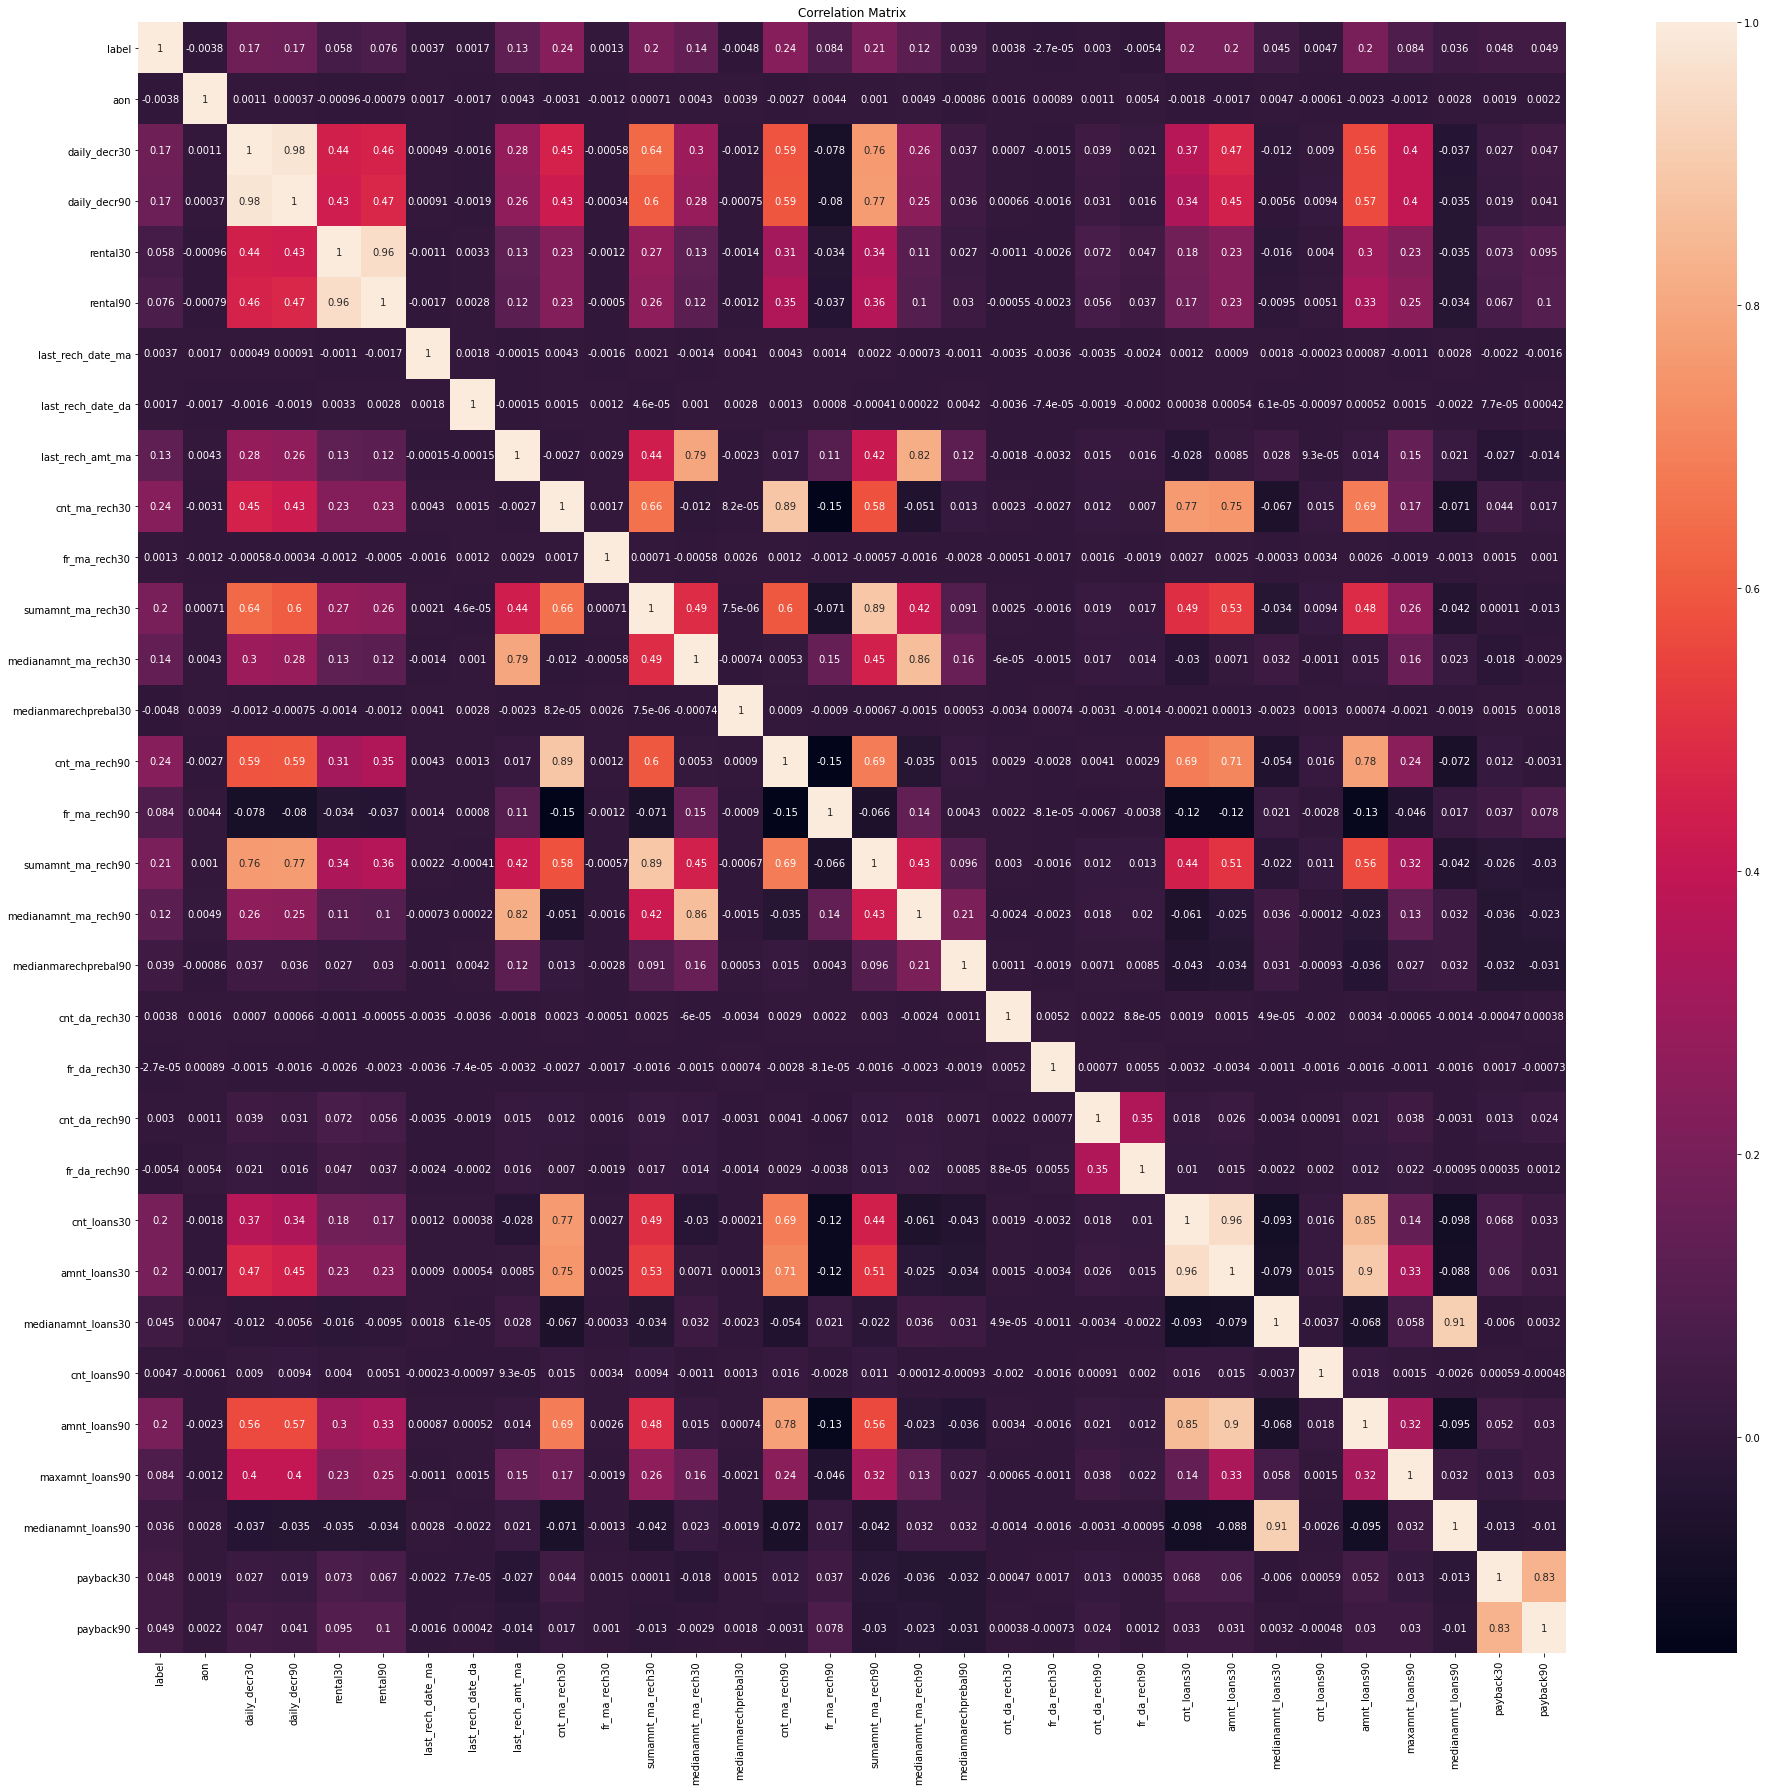

In [580]:
#Using pearson Correlation
plt.figure(figsize=(32,30))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

In [581]:
cor_mat

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


The above heatmap is not clear as there is huge data. Let's check the correlation values by displaying correlation values of independent feature with target variable in sorted form.

In [582]:
cor_mat["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
fr_da_rech30           -0.000027
aon                    -0.003785
medianmare

In [583]:
#with the following function we can select highly correlated features
#it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [584]:
corr_features = correlation(data, 0.8)
len(set(corr_features))

9

In [585]:
corr_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech90'}

These are the duplicate highly correlated columns those can be dropped as there is already a column which has the same correlation.

In [587]:
df.drop(['amnt_loans30',
 'amnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech90'], axis=1, inplace=True)

In [589]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
0,0,-0.177112,0.332156,-0.580786,-0.025513,-0.074007,0.083417,-0.275617,1.603299,-0.177906,0.208594,-0.041301,1.335401,-0.325841,-0.087125,-0.16211,-0.064375,0.011773,0.0,-0.186805,6,1.813266
1,1,0.036453,1.116021,0.339736,0.191368,-0.074007,1.501277,-0.799355,-1.128949,0.219811,1.632404,0.016926,-1.207069,-0.002722,-0.087125,-0.16211,-0.064375,-0.913019,0.0,-1.034294,12,-0.937405
2,1,-0.034659,-0.007508,-0.366965,0.000044,-0.074007,0.083417,-0.799355,-1.128949,-0.535362,0.208594,0.020765,-1.207069,0.023770,-0.087125,-0.16211,-0.064375,-0.913019,0.0,-1.034294,6,-0.937405
3,1,-0.199213,-1.031486,-0.603059,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,-1.902189,-1.961729,-0.063971,-1.207069,-0.370968,-0.087125,-0.16211,-0.064375,0.011773,0.0,-0.186805,6,-0.937405
4,1,0.114880,-0.682337,-0.310473,0.021231,-0.074007,0.449550,0.992270,0.188872,1.262660,0.575164,-0.011178,-0.060965,-0.142977,-0.087125,-0.16211,-0.064375,1.570451,0.0,1.180312,6,0.639236



    > Now we can clearly identify the correlation of independent feature with target variable "label". 
    > There are 11 features that are having less than 0.01 correlation value(Very Week relationship with Target variable).
    > We can retain columns: cnt_ma_rech30, sumamnt_ma_rech30, amnt_loans30, cnt_loans30, daily_decr30, medianamnt_ma_rech30, last_rech_amt_ma, maxamnt_loans90, rental30, payback30, etc as these columns have some informative data for the label prediction.

In [590]:
#Lets split our data into x and y 

x=df.drop(['label'], axis=1)
y=df['label']

x.shape, y.shape

((209593, 21), (209593,))

###### Train_Test_Split:

In [591]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

###### StandardScaler :
        Lets scale our data to bring all the datasets to similar scale.

In [592]:
#Scaling Train dataset
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

x_train=SS.fit_transform(x_train)
x_test=SS.transform(x_test)

###### Handling Imbalanced Data:

In [593]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

As we observe, the data distribution is not uniform.

There is a huge imbalance in the target data. Training a imbalanced data can make the model biased to the mejority class and ignore the minority class entirely. To avoid this, let's balance the data using SMOTETomek Technique.

###### SMOTETomek:
    This technique increases the frequency of the minority class.  

In [595]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=0)

In [596]:
x_train.isna().sum()

aon                     0
daily_decr30            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
fr_ma_rech90            0
medianmarechprebal90    0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
medianamnt_loans30      0
cnt_loans90             0
maxamnt_loans90         0
payback30               0
dtype: int64

In [599]:
from collections import Counter
from imblearn.combine import SMOTETomek
st=SMOTETomek(0.75)

C:\Users\ak38\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [600]:
x_train_st, y_train_st = st.fit_resample(x_train, y_train)
print("The no.of classes before fit {}".format(Counter(y_train)))
print("The no.of classes after fit {}".format(Counter(y_train_st)))

The no.of classes before fit Counter({1: 128455, 0: 18260})
The no.of classes after fit Counter({1: 127173, 0: 95059})


###### Model Building:

In [601]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


dtc=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()

model = [dtc, lr, knn, svc, gnb]

for m in model:
    m.fit(x_train_st,y_train_st)
    y_pred=m.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    
    print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
    print("Accuracy Score of ", m, "is :",acc)
    print("Classification Report :", classification_report(y_test, y_pred))
    print("AUC Score :", roc_auc_score(y_test, y_pred))
    print('\n')
    

Confusion Matrix : [[ 4342  3560]
 [ 5911 49065]]
Accuracy Score of  DecisionTreeClassifier() is : 0.8493749801202328
Classification Report :               precision    recall  f1-score   support

           0       0.42      0.55      0.48      7902
           1       0.93      0.89      0.91     54976

    accuracy                           0.85     62878
   macro avg       0.68      0.72      0.70     62878
weighted avg       0.87      0.85      0.86     62878

AUC Score : 0.7209807495391007




C:\Users\ak38\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : [[ 5560  2342]
 [10313 44663]]
Accuracy Score of  LogisticRegression() is : 0.7987372371894781
Classification Report :               precision    recall  f1-score   support

           0       0.35      0.70      0.47      7902
           1       0.95      0.81      0.88     54976

    accuracy                           0.80     62878
   macro avg       0.65      0.76      0.67     62878
weighted avg       0.87      0.80      0.82     62878

AUC Score : 0.7580141940495457


Confusion Matrix : [[ 5284  2618]
 [ 9627 45349]]
Accuracy Score of  KNeighborsClassifier() is : 0.8052578008206368
Classification Report :               precision    recall  f1-score   support

           0       0.35      0.67      0.46      7902
           1       0.95      0.82      0.88     54976

    accuracy                           0.81     62878
   macro avg       0.65      0.75      0.67     62878
weighted avg       0.87      0.81      0.83     62878

AUC Score : 0.7467893470147551


Co

In [606]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

ens=[rfc, abc, gbc]

for i in ens:
    i.fit(x_train_st,y_train_st)
    y_pred=i.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    
    print("Accuracy Score of ", i, "is :",acc)
    print("Classification Report :", classification_report(y_test, y_pred))
    print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
    print("AUC Score :", roc_auc_score(y_test, y_pred))
    print('\n')

Accuracy Score of  RandomForestClassifier() is : 0.899456089570279
Classification Report :               precision    recall  f1-score   support

           0       0.61      0.55      0.58      7902
           1       0.94      0.95      0.94     54976

    accuracy                           0.90     62878
   macro avg       0.77      0.75      0.76     62878
weighted avg       0.90      0.90      0.90     62878

Confusion Matrix : [[ 4378  3524]
 [ 2798 52178]]
AUC Score : 0.7515710083490748


Accuracy Score of  AdaBoostClassifier() is : 0.8155316644931454
Classification Report :               precision    recall  f1-score   support

           0       0.37      0.70      0.49      7902
           1       0.95      0.83      0.89     54976

    accuracy                           0.82     62878
   macro avg       0.66      0.76      0.69     62878
weighted avg       0.88      0.82      0.84     62878

Confusion Matrix : [[ 5493  2409]
 [ 9190 45786]]
AUC Score : 0.7639883087245416


A

RandomForestClassifier has good f1-score and accuracy score when compared with all other models. Let us perform Kfold cross validation and Hyper parameter tuning for RandomForestClassifier to increase the accuracy of the model.

###### Hyper Parameter tuning and Cross Validation : 

In [607]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [608]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [628]:
ran_class=RandomForestClassifier(class_weight={0: 5, 1: 1})
param={'max_features' : ['auto', 'sqrt', 'log2'],
      'random_state': list(range(0,100))
     }
cv=KFold(n_splits=5,shuffle=False)

In [631]:
GCV=GridSearchCV(ran_class,param,cv=cv, verbose=2)
GCV.fit(x_train_st,y_train_st)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ..................max_features=auto, random_state=0; total time=  48.5s
[CV] END ..................max_features=auto, random_state=0; total time=  46.4s
[CV] END ..................max_features=auto, random_state=0; total time=  45.5s
[CV] END ..................max_features=auto, random_state=0; total time=  40.2s
[CV] END ..................max_features=auto, random_state=0; total time=  39.7s
[CV] END ..................max_features=auto, random_state=1; total time=  46.9s
[CV] END ..................max_features=auto, random_state=1; total time=  47.8s
[CV] END ..................max_features=auto, random_state=1; total time=  45.7s
[CV] END ..................max_features=auto, random_state=1; total time=  44.3s
[CV] END ..................max_features=auto, random_state=1; total time=  46.6s
[CV] END ..................max_features=auto, random_state=2; total time=  49.6s
[CV] END ..................max_features=auto,

[CV] END .................max_features=auto, random_state=20; total time=  42.8s
[CV] END .................max_features=auto, random_state=20; total time=  43.2s
[CV] END .................max_features=auto, random_state=20; total time=  39.0s
[CV] END .................max_features=auto, random_state=20; total time=  38.2s
[CV] END .................max_features=auto, random_state=21; total time=  43.5s
[CV] END .................max_features=auto, random_state=21; total time=  43.5s
[CV] END .................max_features=auto, random_state=21; total time=  43.8s
[CV] END .................max_features=auto, random_state=21; total time=  39.0s
[CV] END .................max_features=auto, random_state=21; total time=  37.9s
[CV] END .................max_features=auto, random_state=22; total time=  43.6s
[CV] END .................max_features=auto, random_state=22; total time=  43.1s
[CV] END .................max_features=auto, random_state=22; total time=  42.3s
[CV] END .................ma

[CV] END .................max_features=auto, random_state=40; total time=  38.1s
[CV] END .................max_features=auto, random_state=40; total time=  37.1s
[CV] END .................max_features=auto, random_state=41; total time=  42.0s
[CV] END .................max_features=auto, random_state=41; total time=  42.4s
[CV] END .................max_features=auto, random_state=41; total time=  41.9s
[CV] END .................max_features=auto, random_state=41; total time=  38.2s
[CV] END .................max_features=auto, random_state=41; total time=  37.0s
[CV] END .................max_features=auto, random_state=42; total time=  42.3s
[CV] END .................max_features=auto, random_state=42; total time=  41.8s
[CV] END .................max_features=auto, random_state=42; total time=  41.7s
[CV] END .................max_features=auto, random_state=42; total time=  38.0s
[CV] END .................max_features=auto, random_state=42; total time=  37.0s
[CV] END .................ma

[CV] END .................max_features=auto, random_state=61; total time=  45.4s
[CV] END .................max_features=auto, random_state=61; total time=  45.4s
[CV] END .................max_features=auto, random_state=61; total time=  46.0s
[CV] END .................max_features=auto, random_state=61; total time=  43.2s
[CV] END .................max_features=auto, random_state=61; total time=  40.8s
[CV] END .................max_features=auto, random_state=62; total time=  46.1s
[CV] END .................max_features=auto, random_state=62; total time=  47.5s
[CV] END .................max_features=auto, random_state=62; total time=  47.1s
[CV] END .................max_features=auto, random_state=62; total time=  40.9s
[CV] END .................max_features=auto, random_state=62; total time=  39.5s
[CV] END .................max_features=auto, random_state=63; total time=  45.6s
[CV] END .................max_features=auto, random_state=63; total time=  44.9s
[CV] END .................ma

[CV] END .................max_features=auto, random_state=81; total time=  44.4s
[CV] END .................max_features=auto, random_state=81; total time=  39.8s
[CV] END .................max_features=auto, random_state=81; total time=  38.5s
[CV] END .................max_features=auto, random_state=82; total time=  43.9s
[CV] END .................max_features=auto, random_state=82; total time=  43.5s
[CV] END .................max_features=auto, random_state=82; total time=  43.1s
[CV] END .................max_features=auto, random_state=82; total time=  39.1s
[CV] END .................max_features=auto, random_state=82; total time=  38.2s
[CV] END .................max_features=auto, random_state=83; total time=  43.2s
[CV] END .................max_features=auto, random_state=83; total time=  42.6s
[CV] END .................max_features=auto, random_state=83; total time=  43.3s
[CV] END .................max_features=auto, random_state=83; total time=  39.6s
[CV] END .................ma

[CV] END ..................max_features=sqrt, random_state=1; total time=  37.7s
[CV] END ..................max_features=sqrt, random_state=2; total time=  43.7s
[CV] END ..................max_features=sqrt, random_state=2; total time=  44.4s
[CV] END ..................max_features=sqrt, random_state=2; total time=  44.8s
[CV] END ..................max_features=sqrt, random_state=2; total time=  39.6s
[CV] END ..................max_features=sqrt, random_state=2; total time=  37.9s
[CV] END ..................max_features=sqrt, random_state=3; total time=  45.5s
[CV] END ..................max_features=sqrt, random_state=3; total time=  45.8s
[CV] END ..................max_features=sqrt, random_state=3; total time=  45.8s
[CV] END ..................max_features=sqrt, random_state=3; total time=  39.7s
[CV] END ..................max_features=sqrt, random_state=3; total time=  38.5s
[CV] END ..................max_features=sqrt, random_state=4; total time=  43.9s
[CV] END ..................m

[CV] END .................max_features=sqrt, random_state=22; total time=  44.3s
[CV] END .................max_features=sqrt, random_state=22; total time=  44.7s
[CV] END .................max_features=sqrt, random_state=22; total time=  39.7s
[CV] END .................max_features=sqrt, random_state=22; total time=  39.1s
[CV] END .................max_features=sqrt, random_state=23; total time=  44.9s
[CV] END .................max_features=sqrt, random_state=23; total time=  44.7s
[CV] END .................max_features=sqrt, random_state=23; total time=  45.3s
[CV] END .................max_features=sqrt, random_state=23; total time=  40.9s
[CV] END .................max_features=sqrt, random_state=23; total time=  39.8s
[CV] END .................max_features=sqrt, random_state=24; total time=  45.5s
[CV] END .................max_features=sqrt, random_state=24; total time=  44.6s
[CV] END .................max_features=sqrt, random_state=24; total time=  44.2s
[CV] END .................ma

[CV] END .................max_features=sqrt, random_state=42; total time=  39.5s
[CV] END .................max_features=sqrt, random_state=42; total time=  37.9s
[CV] END .................max_features=sqrt, random_state=43; total time=  43.8s
[CV] END .................max_features=sqrt, random_state=43; total time=  43.7s
[CV] END .................max_features=sqrt, random_state=43; total time=  43.1s
[CV] END .................max_features=sqrt, random_state=43; total time=  39.0s
[CV] END .................max_features=sqrt, random_state=43; total time=  37.9s
[CV] END .................max_features=sqrt, random_state=44; total time=  44.8s
[CV] END .................max_features=sqrt, random_state=44; total time=  44.2s
[CV] END .................max_features=sqrt, random_state=44; total time=  42.9s
[CV] END .................max_features=sqrt, random_state=44; total time=  39.6s
[CV] END .................max_features=sqrt, random_state=44; total time=  39.8s
[CV] END .................ma

[CV] END .................max_features=sqrt, random_state=63; total time=  45.8s
[CV] END .................max_features=sqrt, random_state=63; total time=  45.6s
[CV] END .................max_features=sqrt, random_state=63; total time=  46.4s
[CV] END .................max_features=sqrt, random_state=63; total time=  41.5s
[CV] END .................max_features=sqrt, random_state=63; total time=  40.6s
[CV] END .................max_features=sqrt, random_state=64; total time=  45.7s
[CV] END .................max_features=sqrt, random_state=64; total time=  45.8s
[CV] END .................max_features=sqrt, random_state=64; total time=  46.4s
[CV] END .................max_features=sqrt, random_state=64; total time=  41.9s
[CV] END .................max_features=sqrt, random_state=64; total time=  40.3s
[CV] END .................max_features=sqrt, random_state=65; total time=  46.6s
[CV] END .................max_features=sqrt, random_state=65; total time=  44.8s
[CV] END .................ma

[CV] END .................max_features=sqrt, random_state=83; total time=  42.4s
[CV] END .................max_features=sqrt, random_state=83; total time=  38.0s
[CV] END .................max_features=sqrt, random_state=83; total time=  37.0s
[CV] END .................max_features=sqrt, random_state=84; total time=  42.7s
[CV] END .................max_features=sqrt, random_state=84; total time=  42.6s
[CV] END .................max_features=sqrt, random_state=84; total time=  42.6s
[CV] END .................max_features=sqrt, random_state=84; total time=  38.3s
[CV] END .................max_features=sqrt, random_state=84; total time=  37.4s
[CV] END .................max_features=sqrt, random_state=85; total time=  42.8s
[CV] END .................max_features=sqrt, random_state=85; total time=  42.3s
[CV] END .................max_features=sqrt, random_state=85; total time=  42.3s
[CV] END .................max_features=sqrt, random_state=85; total time=  38.6s
[CV] END .................ma

[CV] END ..................max_features=log2, random_state=3; total time=  39.7s
[CV] END ..................max_features=log2, random_state=4; total time=  46.0s
[CV] END ..................max_features=log2, random_state=4; total time=  45.7s
[CV] END ..................max_features=log2, random_state=4; total time=  45.5s
[CV] END ..................max_features=log2, random_state=4; total time=  40.9s
[CV] END ..................max_features=log2, random_state=4; total time=  39.3s
[CV] END ..................max_features=log2, random_state=5; total time=  45.5s
[CV] END ..................max_features=log2, random_state=5; total time=  45.6s
[CV] END ..................max_features=log2, random_state=5; total time=  45.2s
[CV] END ..................max_features=log2, random_state=5; total time=  40.6s
[CV] END ..................max_features=log2, random_state=5; total time=  41.3s
[CV] END ..................max_features=log2, random_state=6; total time=  46.3s
[CV] END ..................m

[CV] END .................max_features=log2, random_state=24; total time=  44.5s
[CV] END .................max_features=log2, random_state=24; total time=  44.1s
[CV] END .................max_features=log2, random_state=24; total time=  40.4s
[CV] END .................max_features=log2, random_state=24; total time=  39.9s
[CV] END .................max_features=log2, random_state=25; total time=  46.0s
[CV] END .................max_features=log2, random_state=25; total time=  46.3s
[CV] END .................max_features=log2, random_state=25; total time=  47.1s
[CV] END .................max_features=log2, random_state=25; total time=  41.8s
[CV] END .................max_features=log2, random_state=25; total time=  40.9s
[CV] END .................max_features=log2, random_state=26; total time=  47.2s
[CV] END .................max_features=log2, random_state=26; total time=  47.1s
[CV] END .................max_features=log2, random_state=26; total time=  47.0s
[CV] END .................ma

[CV] END .................max_features=log2, random_state=44; total time=  39.0s
[CV] END .................max_features=log2, random_state=44; total time=  38.2s
[CV] END .................max_features=log2, random_state=45; total time=  43.3s
[CV] END .................max_features=log2, random_state=45; total time=  42.4s
[CV] END .................max_features=log2, random_state=45; total time=  42.6s
[CV] END .................max_features=log2, random_state=45; total time=  38.6s
[CV] END .................max_features=log2, random_state=45; total time=  37.6s
[CV] END .................max_features=log2, random_state=46; total time=  42.3s
[CV] END .................max_features=log2, random_state=46; total time=  42.4s
[CV] END .................max_features=log2, random_state=46; total time= 4.9min
[CV] END .................max_features=log2, random_state=46; total time=  38.1s
[CV] END .................max_features=log2, random_state=46; total time=  37.2s
[CV] END .................ma

[CV] END .................max_features=log2, random_state=65; total time= 1.1min
[CV] END .................max_features=log2, random_state=65; total time= 1.3min
[CV] END .................max_features=log2, random_state=65; total time= 1.3min
[CV] END .................max_features=log2, random_state=65; total time= 1.2min
[CV] END .................max_features=log2, random_state=65; total time= 1.1min
[CV] END .................max_features=log2, random_state=66; total time= 1.3min
[CV] END .................max_features=log2, random_state=66; total time= 1.3min
[CV] END .................max_features=log2, random_state=66; total time= 1.3min
[CV] END .................max_features=log2, random_state=66; total time= 1.1min
[CV] END .................max_features=log2, random_state=66; total time= 1.1min
[CV] END .................max_features=log2, random_state=67; total time= 1.3min
[CV] END .................max_features=log2, random_state=67; total time= 1.2min
[CV] END .................ma

[CV] END .................max_features=log2, random_state=85; total time=  50.8s
[CV] END .................max_features=log2, random_state=85; total time=  47.2s
[CV] END .................max_features=log2, random_state=85; total time=  46.5s
[CV] END .................max_features=log2, random_state=86; total time=  52.9s
[CV] END .................max_features=log2, random_state=86; total time=  49.0s
[CV] END .................max_features=log2, random_state=86; total time=  52.3s
[CV] END .................max_features=log2, random_state=86; total time=  44.3s
[CV] END .................max_features=log2, random_state=86; total time=  44.9s
[CV] END .................max_features=log2, random_state=87; total time=  49.7s
[CV] END .................max_features=log2, random_state=87; total time=  51.2s
[CV] END .................max_features=log2, random_state=87; total time=  46.8s
[CV] END .................max_features=log2, random_state=87; total time=  40.4s
[CV] END .................ma

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight={0: 5, 1: 1}),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             verbose=2)

In [632]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'max_features': 'auto', 'random_state': 1}
Best Estimator :  RandomForestClassifier(class_weight={0: 5, 1: 1}, random_state=1)


In [633]:
gcv_pred=GCV.predict(x_test)
print(confusion_matrix(y_test,gcv_pred))
print(accuracy_score(y_test,gcv_pred))
print(classification_report(y_test,gcv_pred))

[[ 4312  3590]
 [ 2723 52253]]
0.8995992238938898
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      7902
           1       0.94      0.95      0.94     54976

    accuracy                           0.90     62878
   macro avg       0.77      0.75      0.76     62878
weighted avg       0.90      0.90      0.90     62878



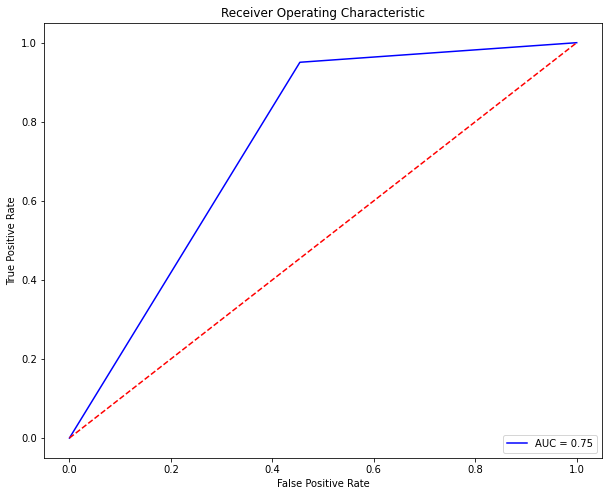

0.7480769662467379

In [636]:
from sklearn import metrics
fpr, tpr, threshold = roc_curve(y_test, gcv_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,gcv_pred)
auc_score

The best accuracy among the above algorithm is 90% with f1 score of 94% and auc score of 75% from the algorithm Random Forest Classifier.
Lets see the features that contirbutes the most towards the best accuracy

<AxesSubplot:>

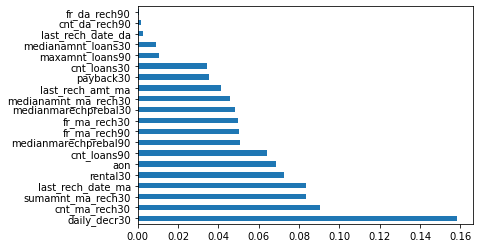

In [659]:
feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

daily_decr30 contributed the most towards the best accuracy followed by cnt_ma_rech30 and sumamnt_ma_rech30 and so on. 

In [660]:
feat_importances

daily_decr30            0.158135
cnt_ma_rech30           0.090542
sumamnt_ma_rech30       0.083551
last_rech_date_ma       0.083462
rental30                0.072306
aon                     0.068281
cnt_loans90             0.063957
medianmarechprebal90    0.050822
fr_ma_rech90            0.050182
fr_ma_rech30            0.049803
medianmarechprebal30    0.047986
medianamnt_ma_rech30    0.045653
last_rech_amt_ma        0.041282
payback30               0.035108
cnt_loans30             0.034136
maxamnt_loans90         0.010725
medianamnt_loans30      0.009206
last_rech_date_da       0.002812
cnt_da_rech90           0.001474
fr_da_rech90            0.000578
dtype: float64